In [1]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

plt.style.use(astropy_mpl_style)

In [2]:
#magphys has been changed to highz without renaming the variable!

In [3]:
path = os.path.expanduser('~/notebook/Chestnuts/')
magphys=Table.read(os.path.expanduser(path+'Parameters76Highz.csv')) #actually highz
path = os.path.expanduser('~/notebook/Mag2/')
mag2=Table.read(os.path.expanduser(path+'Parameters1226mag.csv')) #mag2 with z_spec
mag2 = mag2[mag2['redshift'] != 0]

In [4]:
magphys# len(mag2)

col0,Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,$T_W^{BC}$,$\chi_C^{tot}$,$\chi_{PAH}^{tot}$,$\chi_{MIR}^{tot}$,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,20366,3.531,0.097,0.015,0.13,0.192,2.314e-09,4371000000.0,43710000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.025,391200.0,10.11,0.049,8.604,62.863,-0.167,0.066,3.358
1,11462,3.81,0.104,0.015,0.404,0.061,7.8e-09,3664000000.0,56010000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.025,501200.0,28.58,0.041,7.924,62.863,-0.714,-0.489,3.057
2,12533,3.545,0.099,0.015,0.225,0.017,7.852e-10,25790000000.0,11030000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.004,98670.0,20.25,0.006,8.846,62.863,-0.23,-0.013,6.005
3,12552,3.195,0.097,0.015,0.13,0.192,2.314e-09,3116000000.0,31160000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.025,278900.0,7.21,0.049,8.604,62.863,-0.167,0.066,3.31
4,12903,3.097,0.083,0.015,0.18,0.025,3.117e-09,2115000000.0,5893000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.005,52730.0,6.591,0.008,8.461,62.863,-0.225,0.009,3.24
5,14808,3.673,0.083,0.015,0.18,0.025,3.117e-09,5200000000.0,14490000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.005,129700.0,16.21,0.008,8.461,62.863,-0.225,0.009,4.744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,16834,3.499,0.179,0.015,0.275,0.719,9.307e-09,2354000000.0,197700000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.198,1769000.0,21.91,0.372,7.849,62.863,-0.567,-0.324,2.763
70,22839,3.49,0.309,0.385,0.33,0.677,2.385e-09,7259000000.0,151600000000.0,60.2,24.0,0.282,0.113,0.32,0.285,0.223,43150000.0,17.31,0.289,8.496,42.334,-0.093,0.129,3.017


In [5]:
mask1 = magphys['redshift']<2.75
mask2 = (magphys['redshift']<3) & (magphys['redshift'] >2.75)
mask3 = (magphys['redshift']<3.25) & (magphys['redshift'] >3)
mask4 = (magphys['redshift']<3.5) & (magphys['redshift'] >3.25)
mask5 = (magphys['redshift']<3.75) & (magphys['redshift'] >3.5)
mask6 = magphys['redshift']>3.75

# rem = mag2['redshift'] != 0
maska = mag2['redshift']<0.5 #& (mag2['redshift'] != 0)
maskb = (mag2['redshift']<1) & (mag2['redshift'] >0.5)
maskc = (mag2['redshift']<2) & (mag2['redshift'] >1)
maskd = (mag2['redshift']<3) & (mag2['redshift'] >2)
maske = (mag2['redshift']<4) & (mag2['redshift'] >3)
maskf = mag2['redshift']>4

In [6]:
SM = log10(magphys['M(stars)'])
SFR = log10(magphys[r'$SFR_{0.1Gyr}$'])
SMa = log10(mag2['M(stars)'])
SFRa = log10(mag2[r'$SFR_{0.1Gyr}$'])

SFH=magphys[r'SFH $f_{mu}$']
SFHa=mag2[r'SFH $f_{mu}$']
IR=magphys[r'IR $f_{mu}$']
IRa=mag2[r'IR $f_{mu}$']
mu=magphys[r'$\mu$']
mua=mag2[r'$\mu$']
tauv=magphys[r'$\tau_V$'] 
tauva=mag2[r'$\tau_V$']
sSFR=log10(magphys[r'sSFR$_{0.1Gyr}$'])
sSFRa=log10(mag2[r'sSFR$_{0.1Gyr}$'])
Ldust=log10(magphys['Ldust'])
Ldusta=log10(mag2['Ldust'])
T_CISM=magphys[r'$T_C^{ISM}$']
T_CISMa=mag2[r'$T_C^{ISM}$']
T_WBC=magphys[r'$T_W^{BC}$']
T_WBCa=mag2[r'$T_W^{BC}$']
chiC=magphys[r'$\chi_C^{tot}$']
chiCa=mag2[r'$\chi_C^{tot}$']
chiPAH=magphys[r'$\chi_{PAH}^{tot}$']
chiPAHa=mag2[r'$\chi_{PAH}^{tot}$']
chiMIR=magphys[r'$\chi_{MIR}^{tot}$']
chiMIRa=mag2[r'$\chi_{MIR}^{tot}$']
chiW=magphys[r'$\chi_{W}^{tot}$']
chiWa=mag2[r'$\chi_{W}^{tot}$']
tauISM=magphys[r'$\tau_{V}^{ISM}$']
tauISMa=mag2[r'$\tau_{V}^{ISM}$']
Mdust=log10(magphys['M(dust)'])
Mdusta=log10(mag2['M(dust)'])
redshift=magphys['redshift']
redshifta=mag2['redshift']
#plt.hist([chestnut,chestnut1],bins=15,alpha=0.5,color=['blue','purple'],label=['Magphys','HighZ'])
# plt.legend()
chi2=magphys['chi2']

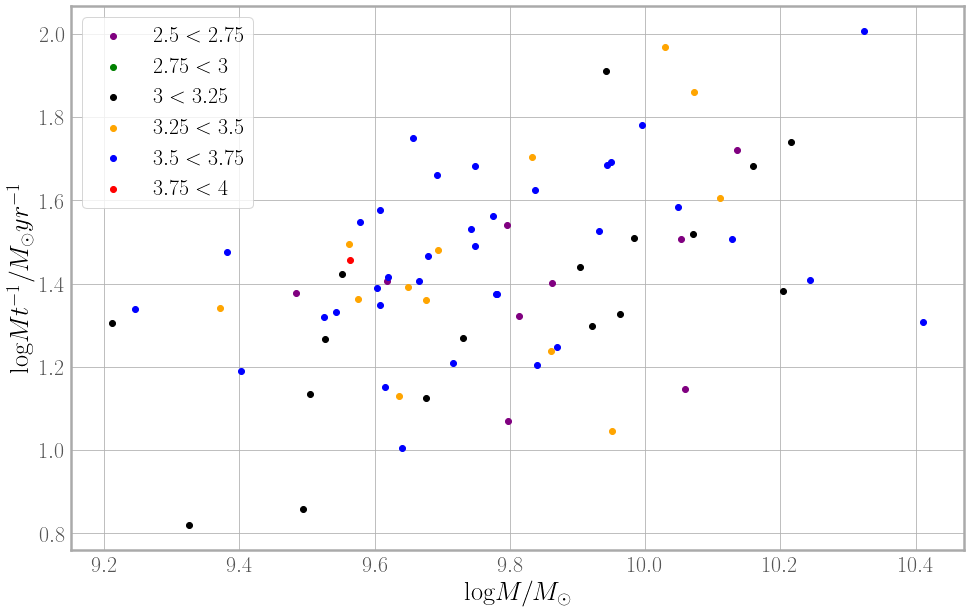

In [51]:
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SM[mask1],SFR[mask1],c='purple',label=r'$2.5<2.75$')
plt.scatter(SM[mask2],SFR[mask2],c='green',label=r'$2.75<3$')
plt.scatter(SM[mask3],SFR[mask3],c='black',label=r'$3<3.25$')
plt.scatter(SM[mask4],SFR[mask4],c='orange',label=r'$3.25<3.5$')
plt.scatter(SM[mask5],SFR[mask5],c='blue',label=r'$3.5<3.75$')
plt.scatter(SM[mask6],SFR[mask6],c='red',label=r'$3.75<4$')
plt.ylabel('log$Mt^{-1}/M_{\odot}yr^{-1}$')
plt.xlabel('log$M/M_{\odot}$')
plt.legend()
plt.savefig('EELGs SMSFR',bbox_inches='tight')

In [8]:
# plt.hist([redshifta,redshift], bins=20, density=True, histtype='bar', stacked=True)
# plt.title('redshifts')
# plt.show()
# plt.hist([SMa,SM], bins=20, density=True, histtype='bar', stacked=True)
# plt.title('M(stars)')
# plt.show()
# plt.hist([SFRa,SFR], bins=20, density=True, histtype='bar', stacked=True)
# plt.title('SFR')
# plt.show()
# plt.hist([Ldusta,Ldust], bins=20, density=True, histtype='bar', stacked=True)
# plt.title('Ldust')
# plt.show()
# plt.hist([sSFRa,sSFR], bins=20, density=True, histtype='bar', stacked=True)
# plt.title('sSFR')
# plt.show()
# plt.hist([Mdusta,Mdust], bins=20, density=True, histtype='bar', stacked=True)
# plt.title('Mdust')
# plt.show()

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate')

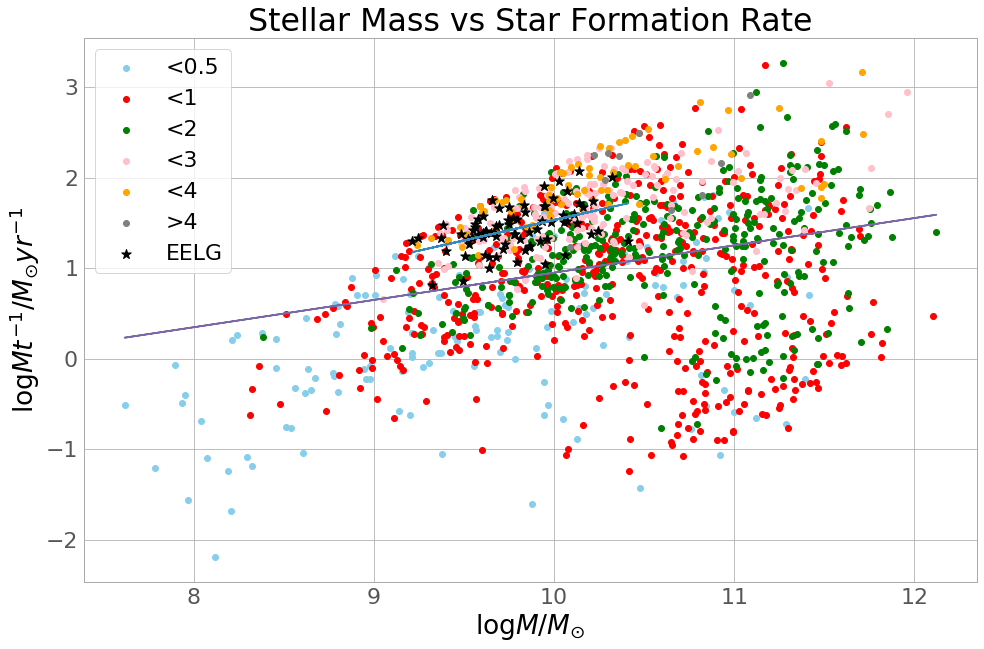

In [9]:
# plt.scatter(SM[mask6],SFR[mask6])
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMa[maska],SFRa[maska],c='skyblue',label='<0.5')
plt.scatter(SMa[maskb],SFRa[maskb],c='red',label='<1')
plt.scatter(SMa[maskc],SFRa[maskc],c='green',label='<2')
plt.scatter(SMa[maskd],SFRa[maskd],c='pink',label='<3')
plt.scatter(SMa[maske],SFRa[maske],c='orange',label='<4')
plt.scatter(SMa[maskf],SFRa[maskf],c='grey',label='>4')
plt.scatter(SM,SFR,marker='*',s=100,c='black',label='EELG') #s=marker size
plt.ylabel('log$Mt^{-1}/M_{\odot}yr^{-1}$')
plt.xlabel('log$M/M_{\odot}$')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)

#find line of best fit
a, b = np.polyfit(SM, SFR, 1)
#add line of best fit to plot
plt.plot(SM, a*SM+b)

#find line of best fit
c, d = np.polyfit(SMa, SFRa, 1)
#add line of best fit to plot
plt.plot(SMa, c*SMa+d)

plt.title('Stellar Mass vs Star Formation Rate')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [10]:
# print(coef)
#ax^2+bx+c

In [11]:
# len(mag2[masktest])

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate')

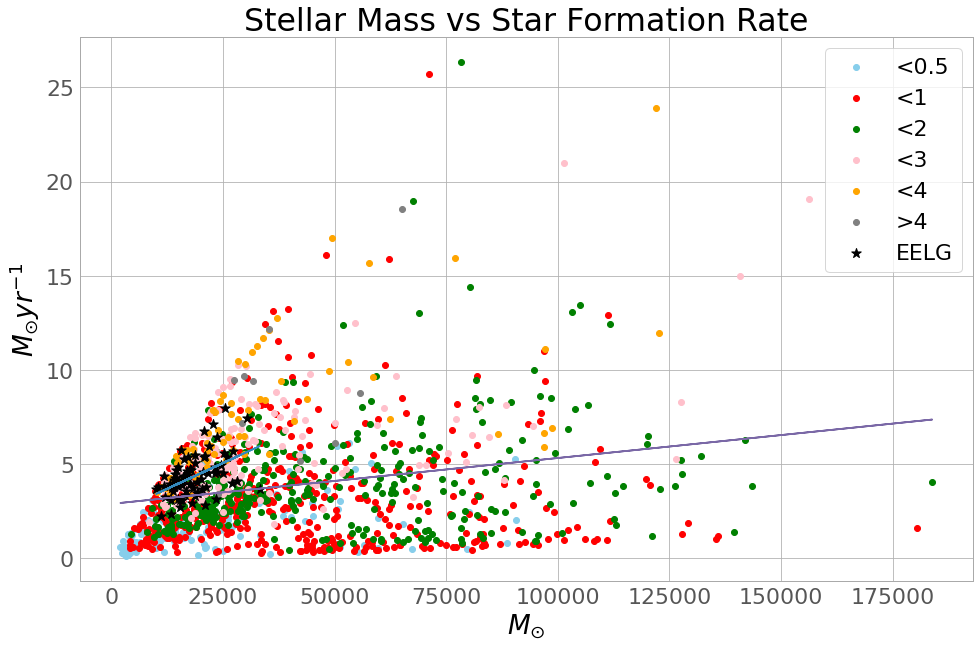

In [12]:
# plt.scatter(SM[mask6],SFR[mask6])
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(exp(SMa[maska]),exp(SFRa[maska]),c='skyblue',label='<0.5')
plt.scatter(exp(SMa[maskb]),exp(SFRa[maskb]),c='red',label='<1')
plt.scatter(exp(SMa[maskc]),exp(SFRa[maskc]),c='green',label='<2')
plt.scatter(exp(SMa[maskd]),exp(SFRa[maskd]),c='pink',label='<3')
plt.scatter(exp(SMa[maske]),exp(SFRa[maske]),c='orange',label='<4')
plt.scatter(exp(SMa[maskf]),exp(SFRa[maskf]),c='grey',label='>4')
plt.scatter(exp(SM),exp(SFR),marker='*',s=100,c='black',label='EELG') #s=marker size
plt.ylabel('$M_{\odot}yr^{-1}$')
plt.xlabel('$M_{\odot}$')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)

#find line of best fit
a, b = np.polyfit(exp(SM), exp(SFR), 1)
#add line of best fit to plot
plt.plot(exp(SM), a*exp(SM)+b)

#find line of best fit
c, d = np.polyfit(exp(SMa), exp(SFRa), 1)
#add line of best fit to plot
plt.plot(exp(SMa), c*exp(SMa)+d)

plt.title('Stellar Mass vs Star Formation Rate')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [13]:
# path = os.path.expanduser('~/notebook/Chestnuts/')
# big=Table.read(os.path.expanduser(path+'Whoa_what2.csv'))
# # print(len(big))
# big=big[big['redshift'] != 0]
# len(big)
# big

In [14]:
Weeknd=pd.read_csv('~/Documents/Weeknd.csv')
Weeknd = Weeknd.drop(columns=Weeknd.columns[0]) #removed bad ids from full sample
# Weeknd

In [15]:
path = os.path.expanduser('~/notebook/Chestnuts/')
big2=pd.read_csv(os.path.expanduser(path+'Whoa_what2.csv'),index_col=0) #before quality cuts
# big2 
#Whoa_what2 is the non SEL and no cuts raw highz sample with the negative redshifts removed
#SM is highz EELGs
#SMa is the magphys full sample with no quality cuts
#SMh is the highz full sample with quality cuts
#SM_ES is the highz EELG sample with SEL removed
#SMs is the highz full sample with SEL removed

In [16]:
merged_big=pd.merge(left=Weeknd,right=big2,left_on='id',right_on='Galaxy_ID') #remove bad ids
merged_big.to_csv('merged_big.csv')

In [17]:
big=Table.read(os.path.expanduser(path+'merged_big.csv'))
big.remove_column('id')
# big.remove_column('col0')
big

col0,Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,$T_W^{BC}$,$\chi_C^{tot}$,$\chi_{PAH}^{tot}$,$\chi_{MIR}^{tot}$,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1,0.61654,0.747,0.787,0.111,7.538,2.784e-11,1302000000000.0,981300000000.0,65.7,34.1,0.782,0.01,0.103,0.105,0.834,94980000.0,36.25,0.927,9.683,38.249,0.47,0.66,1.312
1,2,0.43408,0.124,0.227,0.12,0.606,5.176e-10,5736000000.0,19060000000.0,71.4,30.3,0.221,0.011,0.178,0.59,0.073,1149000.0,2.969,0.133,9.185,59.887,-0.137,0.073,0.813
2,3,0.9542,0.479,0.385,0.133,9.303,3.702e-10,115900000000.0,541400000000.0,60.2,24.0,0.282,0.113,0.32,0.285,1.238,154100000.0,42.9,1.482,9.367,42.334,0.164,0.315,2.054
3,4,3.81199,0.111,0.015,0.583,0.104,1.008e-08,4867000000000.0,246400000000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,2205000000.0,49050.0,0.093,7.791,62.863,-0.986,-0.791,120.816
4,5,4.86526,0.159,0.015,0.322,0.602,1.239e-08,164200000000.0,25910000000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.194,231900000.0,2034.0,0.373,7.55,62.863,-0.274,0.005,59.343
5,6,1.12147,0.607,0.689,0.139,1.23,2.302e-11,115000000000.0,38170000000.0,45.1,26.1,0.612,0.137,0.053,0.198,0.171,14390000.0,2.648,0.194,9.418,31.569,0.091,0.292,1.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24084,30903,1.05302,0.236,0.037,0.161,1.144,2.064e-09,4565000000.0,81540000000.0,77.7,29.7,0.035,0.019,0.533,0.412,0.184,963800.0,9.421,0.315,8.702,73.749,-0.281,-0.064,3.093
24085,30905,1.70781,0.412,0.379,0.326,1.532,1.147e-09,38880000000.0,507900000000.0,78.0,35.3,0.375,0.049,0.071,0.505,0.5,21190000.0,44.58,0.627,8.8,59.383,-0.146,0.051,0.803


In [18]:
#Full highz sample redshift masks using indexing notation because I redshifth after this :)
maskaa = big['redshift']<0.5 #& (mag2['redshift'] != 0)
maskbb = (big['redshift']<1) & (big['redshift'] >0.5)
maskcc = (big['redshift']<2) & (big['redshift'] >1)
maskdd = (big['redshift']<3) & (big['redshift'] >2)
maskee = (big['redshift']<4) & (big['redshift'] >3)
maskff = big['redshift']>4

In [19]:
#Full highz sample definitions
SFRh = log10(big[r'$SFR_{0.1Gyr}$'])
SMh = log10(big['M(stars)'])
# SFRa = log10(mag2[r'$SFR_{0.1Gyr}$'])
# Parameters=[,r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$']
# SFH=magphys[r'SFH $f_{mu}$']
SFHh=big[r'SFH $f_{mu}$']
# IR=magphys[r'IR $f_{mu}$']
IRh=big[r'IR $f_{mu}$']
# mu=magphys[r'$\mu$']
muh=big[r'$\mu$']
# tauv=magphys[r'$\tau_V$'] 
tauvh=big[r'$\tau_V$']
# sSFR=log10(magphys[r'sSFR$_{0.1Gyr}$'])
sSFRh=log10(big[r'sSFR$_{0.1Gyr}$'])
# Ldust=log10(magphys['Ldust'])
Ldusth=log10(big['Ldust'])
# T_CISM=magphys[r'$T_C^{ISM}$']
T_CISMh=big[r'$T_C^{ISM}$']
# T_WBC=magphys[r'$T_W^{BC}$']
T_WBCh=big[r'$T_W^{BC}$']
# chiC=magphys[r'$\chi_C^{tot}$']
chiCh=big[r'$\chi_C^{tot}$']
# chiPAH=magphys[r'$\chi_{PAH}^{tot}$']
chiPAHh=big[r'$\chi_{PAH}^{tot}$']
# chiMIR=magphys[r'$\chi_{MIR}^{tot}$']
chiMIRh=big[r'$\chi_{MIR}^{tot}$']
# chiW=magphys[r'$\chi_{W}^{tot}$']
chiWh=big[r'$\chi_{W}^{tot}$']
# tauISM=magphys[r'$\tau_{V}^{ISM}$']
tauISMh=big[r'$\tau_{V}^{ISM}$']
# Mdust=log10(magphys['M(dust)'])
Mdusth=log10(big['M(dust)'])
# redshift=magphys['redshift']
redshifth=big['redshift']

chi2h=big['chi2']

In [20]:
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    return fig,ax1,ax2,ax3

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/3070739881.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/3070739881.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


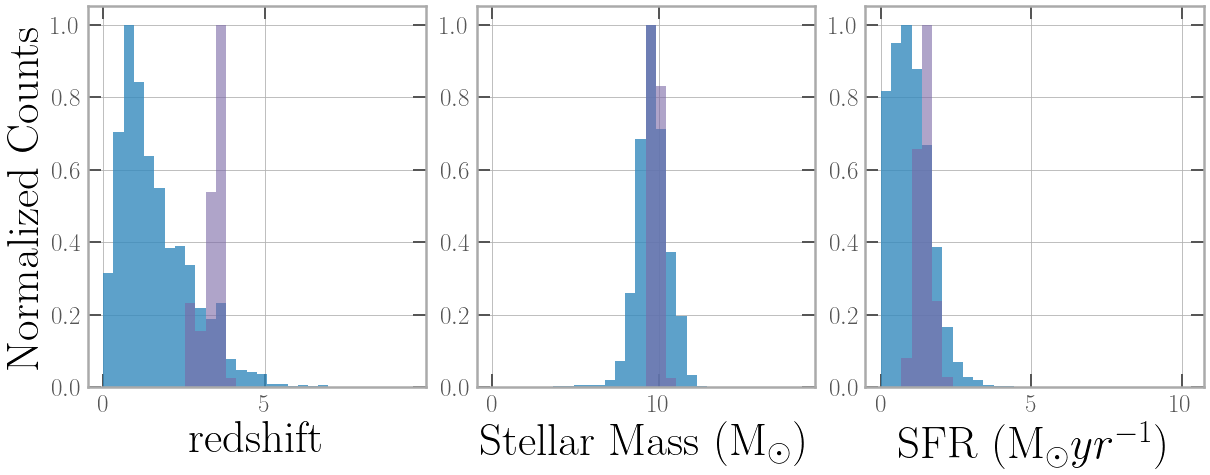

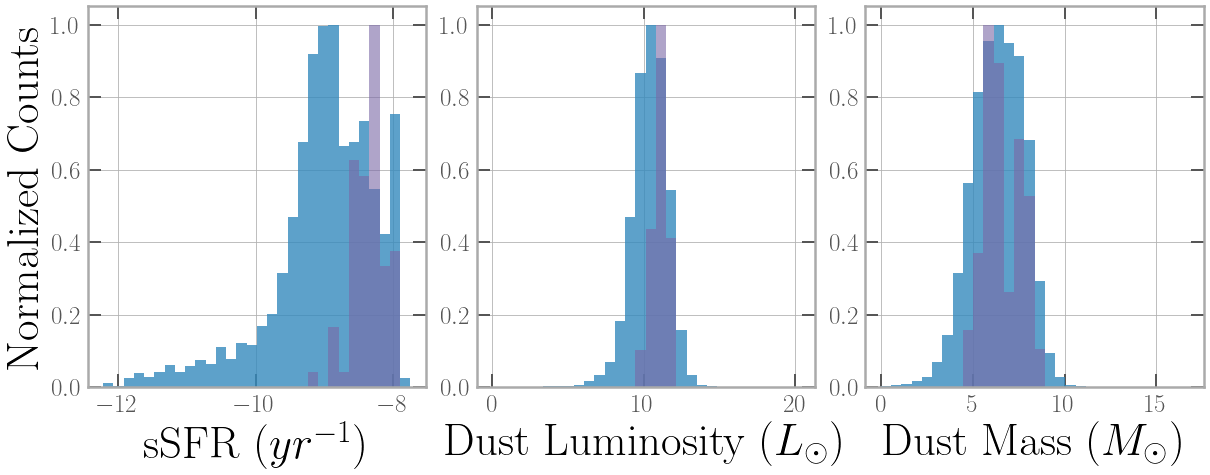

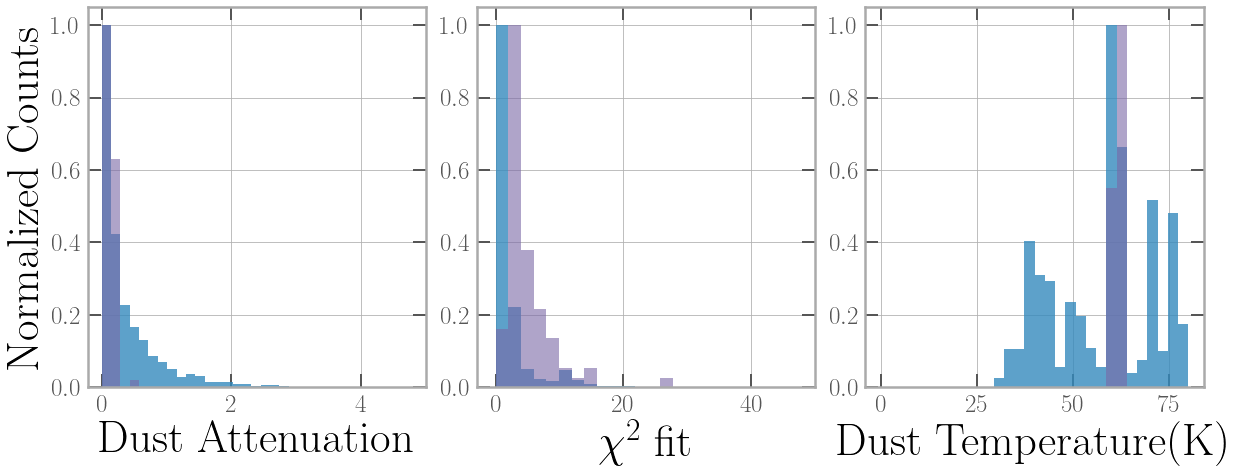

In [52]:
#highz EELG vs full sample histograms
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifth),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifth, bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMh),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMh, bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRh),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRh, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRh),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRh, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusth),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusth, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusth),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusth, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()

In [22]:
# # x,bins,p=plt.hist([redshifth,redshift], bins=20, density=True, histtype='bar')#, stacked=True)
# x, bins, p=plt.hist([redshifth,redshift], density=True)
# # plt.bar(x, y2 ,bottom=y1,label='y2')
# # for item in p:
# #     item.set_height(item.get_height()/sum(x))
# plt.title('redshifts')
# plt.show()
# # plt.hist([SMh,SM], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([SMh,SM], density=True)
# plt.title('M(stars)')
# plt.show()
# # plt.hist([SFRh,SFR], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([SFRh,SFR], density=True)
# plt.title('SFR')
# plt.show()
# # plt.hist([Ldusth,Ldust], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([Ldusth,Ldust], density=True)
# plt.title('Ldust')
# plt.show()
# plt.hist([sSFRh,sSFR], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([sSFRh,sSFR], density=True)
# plt.title('sSFR')
# plt.show()
# # plt.hist([Mdusth,Mdust], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([Mdusth,Mdust], density=True)
# plt.title('Mdust')
# plt.show()

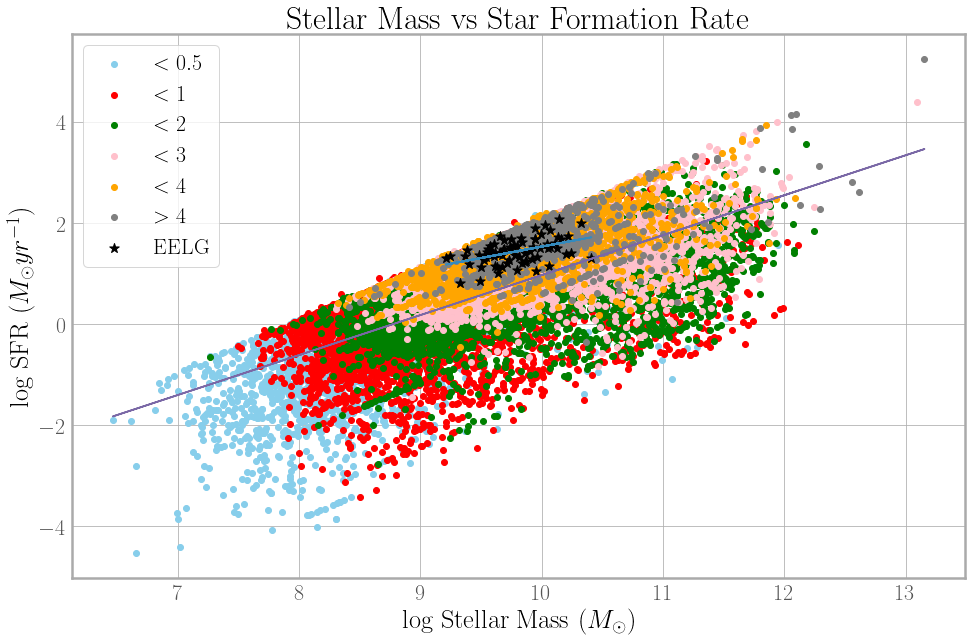

In [53]:
#main highz SM SFR plot with removed contaminants
# plt.scatter(SM[mask6],SFR[mask6])
maskchi=big['chi2'] <10
maskred=big['redshift']>0.1
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskaa*maskchi*maskred],SFRh[maskaa*maskchi*maskred],c='skyblue',label=r'$<0.5$')
plt.scatter(SMh[maskbb*maskchi*maskred],SFRh[maskbb*maskchi*maskred],c='red',label=r'$<1$')
plt.scatter(SMh[maskcc*maskchi*maskred],SFRh[maskcc*maskchi*maskred],c='green',label=r'$<2$')
plt.scatter(SMh[maskdd*maskchi*maskred],SFRh[maskdd*maskchi*maskred],c='pink',label=r'$<3$')
plt.scatter(SMh[maskee*maskchi*maskred],SFRh[maskee*maskchi*maskred],c='orange',label=r'$<4$')
plt.scatter(SMh[maskff*maskchi*maskred],SFRh[maskff*maskchi*maskred],c='grey',label=r'$>4$')
plt.scatter(SM,SFR,marker='*',s=100,c='black',label='EELG') #s=marker size
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)

#find line of best fit
a, b = np.polyfit(SM, SFR, 1)
#add line of best fit to plot
plt.plot(SM, a*SM+b)

#find line of best fit
c, d = np.polyfit(SMh[maskchi*maskred], SFRh[maskchi*maskred], 1)
#add line of best fit to plot
plt.plot(SMh[maskchi*maskred], c*SMh[maskchi*maskred]+d)

plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass Relation full',bbox_inches='tight')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [24]:
print(len(SMh[maskchi]))

22354


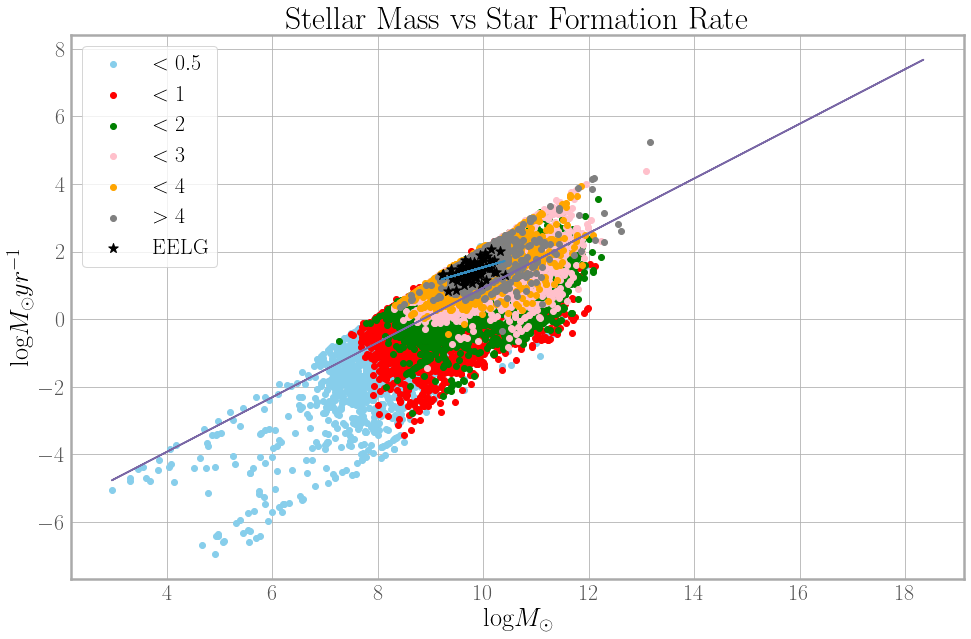

In [25]:
#Full highz set without removing super low redshift contaminants
# plt.scatter(SM[mask6],SFR[mask6])
maskchi=big['chi2'] <10
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskaa*maskchi],SFRh[maskaa*maskchi],c='skyblue',label=r'$<0.5$')
plt.scatter(SMh[maskbb*maskchi],SFRh[maskbb*maskchi],c='red',label=r'$<1$')
plt.scatter(SMh[maskcc*maskchi],SFRh[maskcc*maskchi],c='green',label=r'$<2$')
plt.scatter(SMh[maskdd*maskchi],SFRh[maskdd*maskchi],c='pink',label=r'$<3$')
plt.scatter(SMh[maskee*maskchi],SFRh[maskee*maskchi],c='orange',label=r'$<4$')
plt.scatter(SMh[maskff*maskchi],SFRh[maskff*maskchi],c='grey',label=r'$>4$')
plt.scatter(SM,SFR,marker='*',s=100,c='black',label='EELG') #s=marker size
plt.ylabel('log$M_{\odot}yr^{-1}$')
plt.xlabel('log$M_{\odot}$')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)

#find line of best fit
a, b = np.polyfit(SM, SFR, 1)
#add line of best fit to plot
plt.plot(SM, a*SM+b)

#find line of best fit
c, d = np.polyfit(SMh, SFRh, 1)
#add line of best fit to plot
plt.plot(SMh, c*SMh+d)

plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass Relation full')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

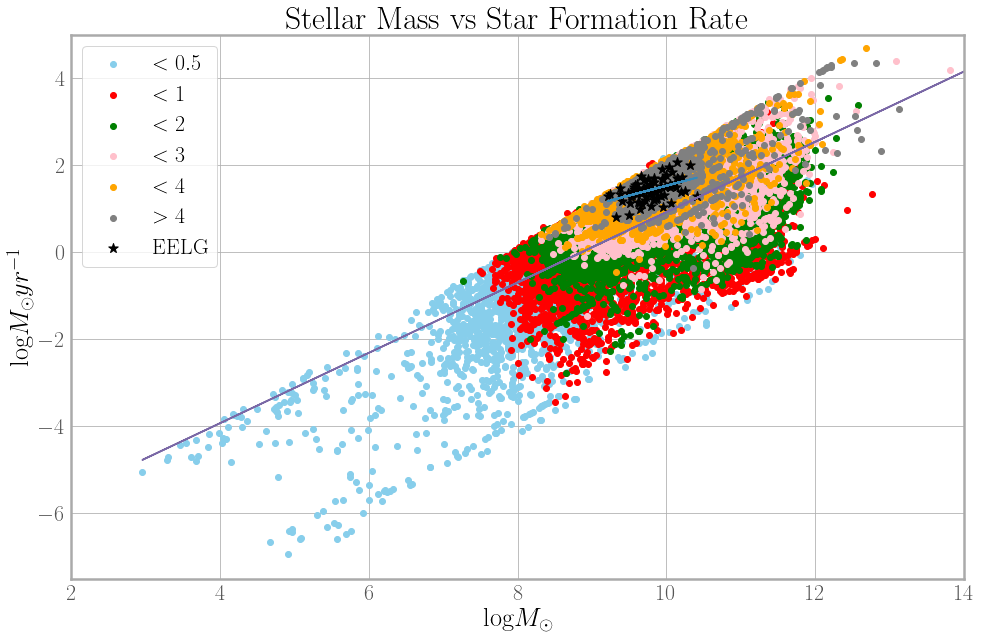

In [26]:
#Full highz sample SM vs SFR plot without removing contaminants
# plt.scatter(SM[mask6],SFR[mask6])
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskaa],SFRh[maskaa],c='skyblue',label=r'$<0.5$')
plt.scatter(SMh[maskbb],SFRh[maskbb],c='red',label=r'$<1$')
plt.scatter(SMh[maskcc],SFRh[maskcc],c='green',label=r'$<2$')
plt.scatter(SMh[maskdd],SFRh[maskdd],c='pink',label=r'$<3$')
plt.scatter(SMh[maskee],SFRh[maskee],c='orange',label=r'$<4$')
plt.scatter(SMh[maskff],SFRh[maskff],c='grey',label=r'$>4$')
plt.scatter(SM,SFR,marker='*',s=100,c='black',label='EELG') #s=marker size
plt.ylabel('log$M_{\odot}yr^{-1}$')
plt.xlabel('log$M_{\odot}$')
plt.legend()
plt.xlim(2,14)
plt.ylim(-7.5,5)
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)

#find line of best fit
a, b = np.polyfit(SM, SFR, 1)
#add line of best fit to plot
plt.plot(SM, a*SM+b)

#find line of best fit
c, d = np.polyfit(SMh, SFRh, 1)
#add line of best fit to plot
plt.plot(SMh, c*SMh+d)

plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass relation full2')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [27]:
len(SMh)

24091

In [28]:
# big[log10(big['M(stars)'])<0]

In [29]:
# big[log10(big['M(stars)'])>16] #High redshift and really bad chi2 of 125

In [30]:
# big[log10(big['M(stars)'])<6]

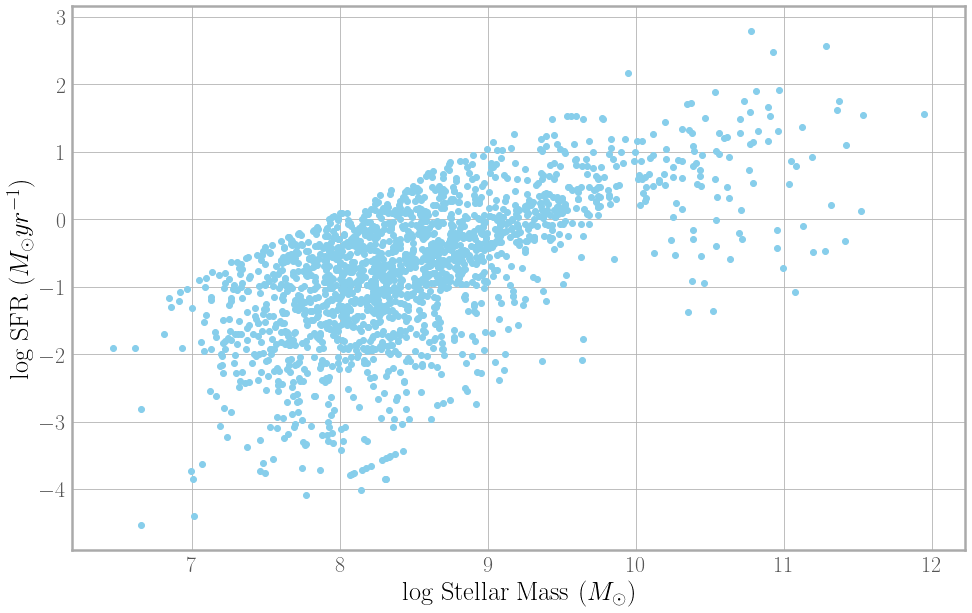

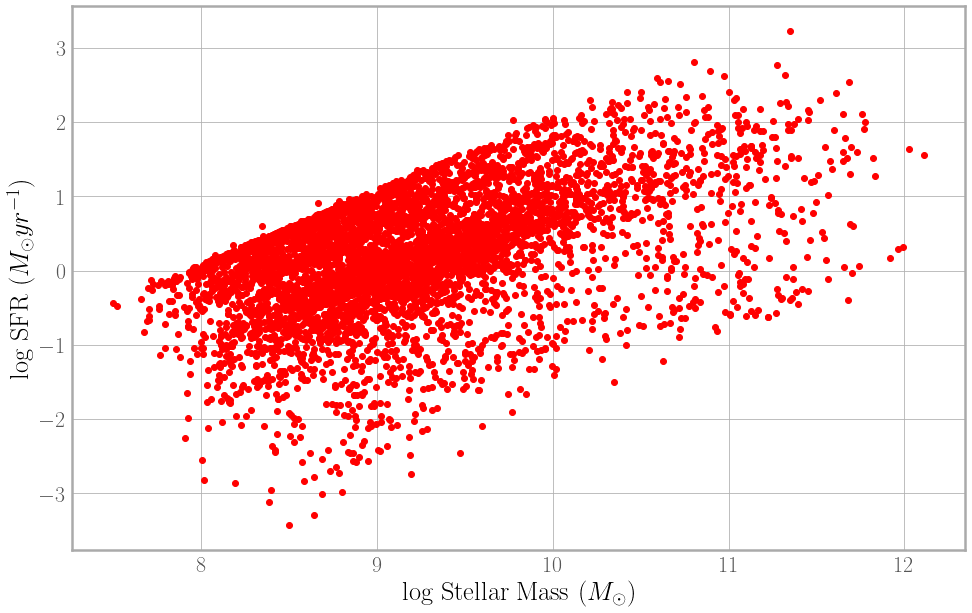

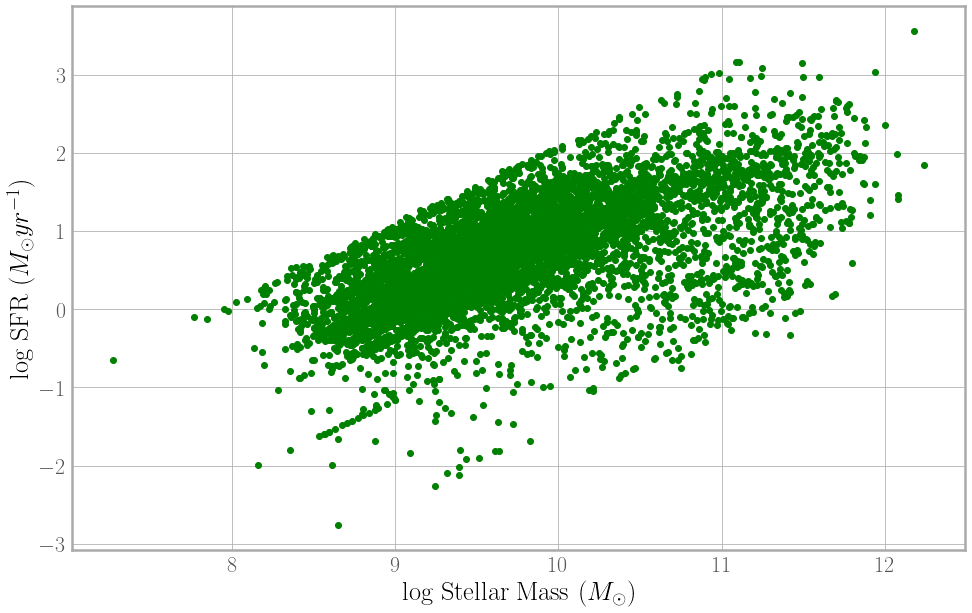

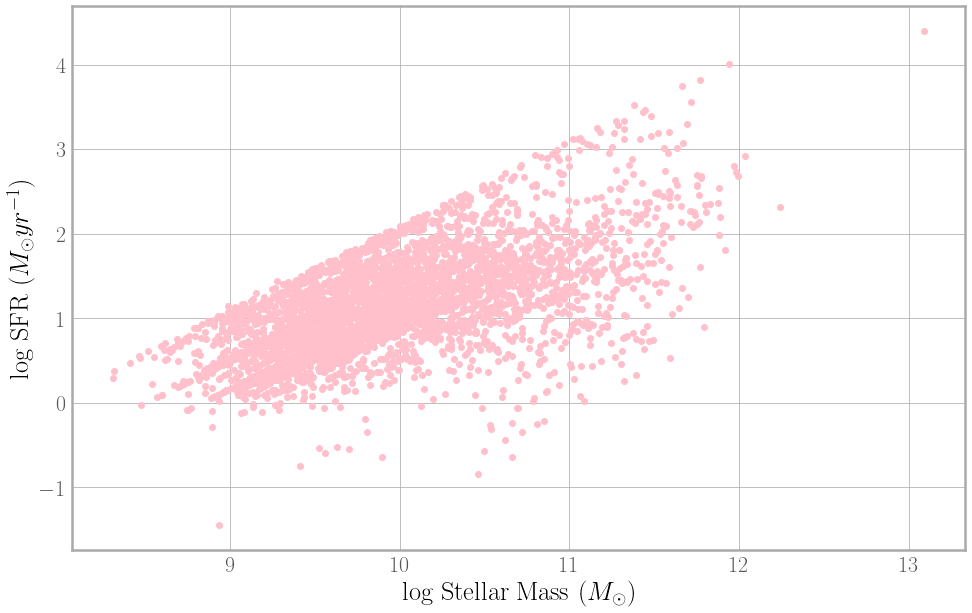

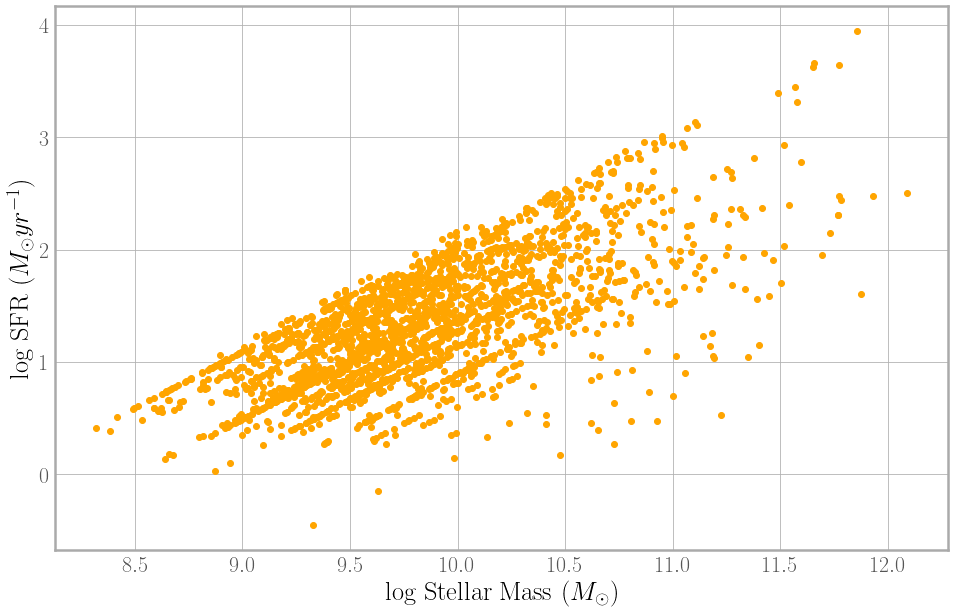

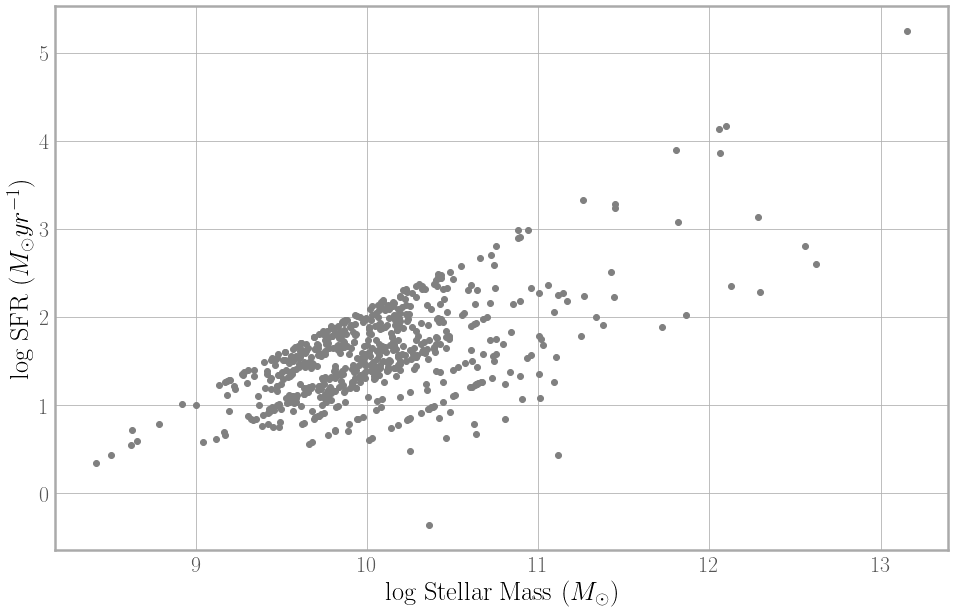

Text(0.5, 1.0, 'EELG Stellar Mass vs Star Formation Rate')

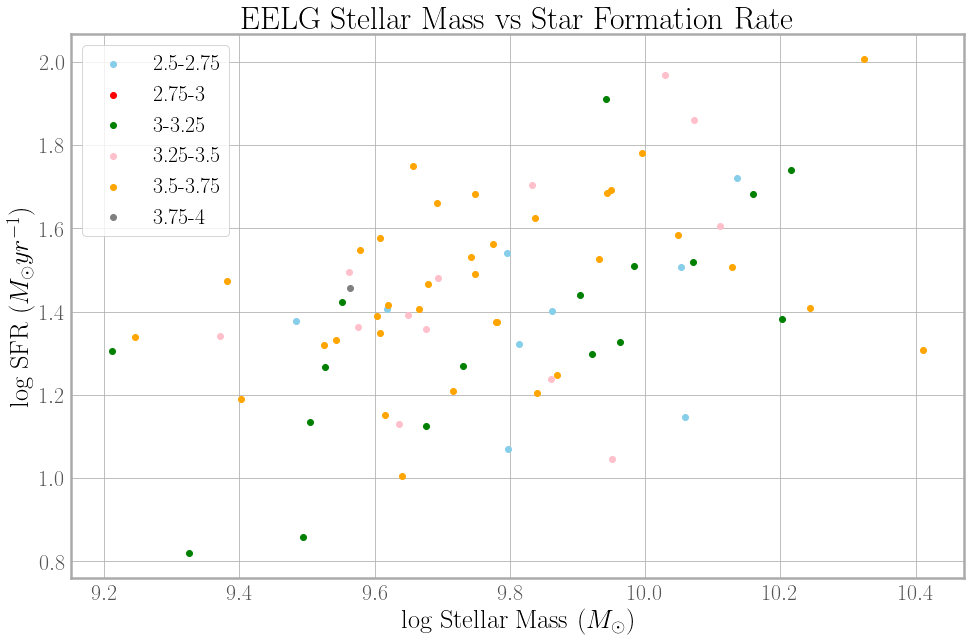

In [31]:
# Individual redshift deliniations for the full highz sample with contaminants removed
# plt.scatter(SM[mask6],SFR[mask6])
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskaa*maskchi*maskred],SFRh[maskaa*maskchi*maskred],c='skyblue',label='<0.5')
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.savefig('lowestredshift',bbox_inches='tight')
plt.show()
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskbb*maskchi*maskred],SFRh[maskbb*maskchi*maskred],c='red',label='<1')
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.savefig('<1',bbox_inches='tight')
plt.show()
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskcc*maskchi*maskred],SFRh[maskcc*maskchi*maskred],c='green',label='<2')
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.savefig('<2',bbox_inches='tight')
plt.show()
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskdd*maskchi*maskred],SFRh[maskdd*maskchi*maskred],c='pink',label='<3')
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.savefig('<3',bbox_inches='tight')
plt.show()
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskee*maskchi*maskred],SFRh[maskee*maskchi*maskred],c='orange',label='<4')
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.savefig('4',bbox_inches='tight')
plt.show()
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maskff*maskchi*maskred],SFRh[maskff*maskchi*maskred],c='grey',label='>4')
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.savefig('>4',bbox_inches='tight')
# plt.xlim(7.5,14)
plt.show()
plt.figure(figsize=(16,10))

mpl.rcParams.update({'font.size': 22})
plt.scatter(SM[mask1],SFR[mask1],c='skyblue',label=r'2.5-2.75')
plt.scatter(SM[mask2],SFR[mask2],c='red',label=r'2.75-3')
plt.scatter(SM[mask3],SFR[mask3],c='green',label=r'3-3.25')
plt.scatter(SM[mask4],SFR[mask4],c='pink',label='3.25-3.5')
plt.scatter(SM[mask5],SFR[mask5],c='orange',label='3.5-3.75')
plt.scatter(SM[mask6],SFR[mask6],c='grey',label='3.75-4')
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.legend()
plt.savefig('EELGs',bbox_inches='tight')
# plt.scatter(SM,SFR,marker='*',s=100,c='black',label='EELG') #s=marker size
# plt.ylabel('log$M_{\odot}yr^{-1}$')
# plt.xlabel('log$M_{\odot}$')
# plt.legend()
# plt.xlim(2,14)
# plt.ylim(-7.5,5)
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)

# #find line of best fit
# a, b = np.polyfit(SM, SFR, 1)
# #add line of best fit to plot
# plt.plot(SM, a*SM+b)

# #find line of best fit
# c, d = np.polyfit(SMh, SFRh, 1)
# #add line of best fit to plot
# plt.plot(SMh, c*SMh+d)

plt.title('EELG Stellar Mass vs Star Formation Rate')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [32]:
#import full Strong emission line contaminated filters removed set(SEL) 
path = os.path.expanduser('~/notebook/Chestnuts/')
SEL=pd.read_csv(os.path.expanduser(path+'StrongEL.csv'),index_col=0)
SEL

,Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,...,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
0,1,0.61654,0.897,0.984,0.429,11.636,1.853000e-11,3.852000e+12,4.509000e+12,62.5,...,0.014,4.997,432300000.0,71.3700,5.404,9.584,36.260,1.195,1.228,259.813
1,2,0.43408,0.868,0.984,0.440,7.292,1.423000e-11,5.401000e+10,3.867000e+10,62.5,...,0.014,3.211,3707000.0,0.7684,3.491,9.857,36.260,0.987,1.074,299.269
2,3,0.95420,0.343,0.385,0.325,2.976,9.958000e-11,1.731000e+11,4.124000e+11,60.2,...,0.285,0.967,117400000.0,17.2300,1.261,9.659,42.334,0.382,0.550,88.400
3,4,3.81199,0.111,0.015,0.583,0.104,1.008000e-08,9.552000e+09,4.837000e+11,63.3,...,0.637,0.061,4328000.0,96.2800,0.093,7.791,62.863,-0.986,-0.791,372.905
4,5,4.86526,0.111,0.015,0.583,0.104,1.008000e-08,1.371000e+10,6.942000e+11,63.3,...,0.637,0.061,6212000.0,138.2000,0.093,7.791,62.863,-0.986,-0.791,273.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,30906,0.68055,0.161,0.290,0.195,6.197,1.103000e-08,2.468000e+08,8.240000e+10,32.8,...,0.640,1.209,30690000.0,2.7220,2.605,7.338,32.272,-0.730,-0.610,61.709
4091,30907,2.44406,0.090,0.015,0.279,0.120,3.269000e-09,1.496000e+10,1.414000e+11,63.3,...,0.637,0.034,1265000.0,48.9200,0.060,8.410,62.863,-0.551,-0.358,12.119
4092,30908,1.07964,0.332,0.306,0.304,11.246,3.960000e-10,3.446000e+11,3.444000e+12,69.9,...,0.568,3.424,188200000.0,136.4000,4.140,9.602,56.697,0.848,0.947,55.924
4093,30910,2.33941,0.124,0.015,0.228,1.524,6.002000e-09,2.846000e+09,3.561000e+11,63.3,...,0.637,0.347,3186000.0,17.0800,0.976,8.861,62.863,-0.792,-0.630,2.662


In [33]:
#Separating the EELGs from the total SEL using galaxy ids
path = os.path.expanduser('~/notebook/Chestnuts/')
EELG_IDs=pd.read_csv(os.path.expanduser(path+'Parameters76Highz.csv'))
EELGSEL = pd.merge(left=EELG_IDs['Galaxy_ID'],right=SEL, left_on='Galaxy_ID', right_on='Galaxy_ID')
# EELGSEL
EELGSEL.to_csv('EELG_SEL.csv')
EELG_SEL=Table.read(os.path.expanduser(path+'EELG_SEL.csv'))
EELG_SEL.remove_column('col0')

# EELG_SEL.round({'redshift':3})
EELG_SEL

Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,$T_W^{BC}$,$\chi_C^{tot}$,$\chi_{PAH}^{tot}$,$\chi_{MIR}^{tot}$,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20366,3.53172,0.111,0.015,0.583,0.104,1.008e-08,602400000.0,30500000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,272900.0,6.071,0.093,7.791,62.863,-0.986,-0.791,3.265
11462,3.81006,0.111,0.015,0.583,0.104,1.008e-08,1839000000.0,93110000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,833200.0,18.53,0.093,7.791,62.863,-0.986,-0.791,15.552
12533,3.54599,0.136,0.015,0.495,0.024,3.226e-09,6539000000.0,14460000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.012,129300.0,21.1,0.016,8.456,62.863,-0.525,-0.322,22.478
12552,3.19594,0.083,0.015,0.18,0.025,3.117e-09,1614000000.0,4498000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.005,40250.0,5.031,0.008,8.461,62.863,-0.225,0.009,3.045
12903,3.09734,0.111,0.015,0.583,0.104,1.008e-08,524200000.0,26540000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,237500.0,5.284,0.093,7.791,62.863,-0.986,-0.791,4.56
14808,3.67329,0.111,0.015,0.583,0.104,1.008e-08,1365000000.0,69100000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.061,618300.0,13.75,0.093,7.791,62.863,-0.986,-0.791,7.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16834,3.49973,0.136,0.015,0.495,0.024,3.226e-09,2290000000.0,5061000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.012,45290.0,7.387,0.016,8.456,62.863,-0.525,-0.322,2.403
22839,3.49055,0.066,0.015,0.199,0.015,1.876e-09,4066000000.0,3734000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.003,33410.0,7.626,0.006,8.705,62.863,-0.394,-0.182,4.178


In [34]:
#Definitions for EELG SEL data
SFR_ES = log10(EELG_SEL[r'$SFR_{0.1Gyr}$'])
SM_ES = log10(EELG_SEL['M(stars)'])
# SFRa = log10(mag2[r'$SFR_{0.1Gyr}$'])
# Parameters=[,r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$']
# SFH=magphys[r'SFH $f_{mu}$']
SFH_ES=EELG_SEL[r'SFH $f_{mu}$']
# IR=magphys[r'IR $f_{mu}$']
IR_ES=EELG_SEL[r'IR $f_{mu}$']
# mu=magphys[r'$\mu$']
mu_ES=EELG_SEL[r'$\mu$']
# tauv=magphys[r'$\tau_V$'] 
tauv_ES=EELG_SEL[r'$\tau_V$']
# sSFR=log10(magphys[r'sSFR$_{0.1Gyr}$'])
sSFR_ES=log10(EELG_SEL[r'sSFR$_{0.1Gyr}$'])
# Ldust=log10(magphys['Ldust'])
Ldust_ES=log10(EELG_SEL['Ldust'])
# T_CISM=magphys[r'$T_C^{ISM}$']
T_CISM_ES=EELG_SEL[r'$T_C^{ISM}$']
# T_WBC=magphys[r'$T_W^{BC}$']
T_WBC_ES=EELG_SEL[r'$T_W^{BC}$']
# chiC=magphys[r'$\chi_C^{tot}$']
chiC_ES=EELG_SEL[r'$\chi_C^{tot}$']
# chiPAH=magphys[r'$\chi_{PAH}^{tot}$']
chiPAH_ES=EELG_SEL[r'$\chi_{PAH}^{tot}$']
# chiMIR=magphys[r'$\chi_{MIR}^{tot}$']
chiMIR_ES=EELG_SEL[r'$\chi_{MIR}^{tot}$']
# chiW=magphys[r'$\chi_{W}^{tot}$']
chiW_ES=EELG_SEL[r'$\chi_{W}^{tot}$']
# tauISM=magphys[r'$\tau_{V}^{ISM}$']
tauISM_ES=EELG_SEL[r'$\tau_{V}^{ISM}$']
# Mdust=log10(magphys['M(dust)'])
Mdust_ES=log10(EELG_SEL['M(dust)'])
# redshift=magphys['redshift']
redshift_ES=EELG_SEL['redshift']

chi2_ES=EELG_SEL['chi2']

In [120]:
EELG_SEL[EELG_SEL['Galaxy_ID'] == 21896]

Galaxy_ID,redshift,SFH $f_{mu}$,IR $f_{mu}$,$\mu$,$\tau_V$,sSFR$_{0.1Gyr}$,M(stars),Ldust,$T_C^{ISM}$,$T_W^{BC}$,$\chi_C^{tot}$,$\chi_{PAH}^{tot}$,$\chi_{MIR}^{tot}$,$\chi_{W}^{tot}$,$\tau_{V}^{ISM}$,M(dust),$SFR_{0.1Gyr}$,$A_V$,$age_M$,Tdust,lg(M/Lh),lg(M/Lk),chi2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
21896,3.52062,0.136,0.015,0.495,0.024,3.226e-09,5321000000.0,11760000000.0,63.3,39.3,0.01,0.128,0.224,0.637,0.012,105200.0,17.17,0.016,8.456,62.863,-0.525,-0.322,14.772


/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/2444240089.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/2444240089.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


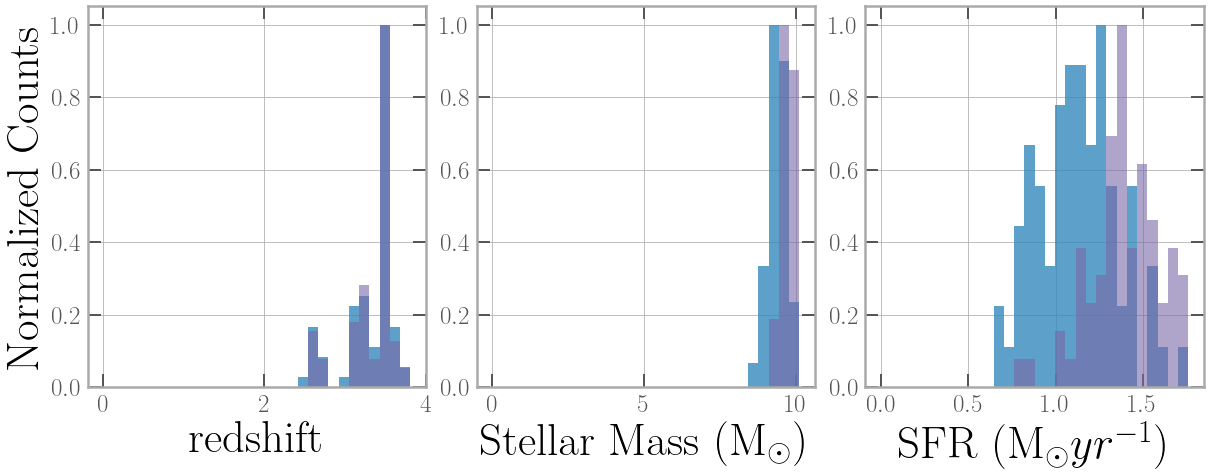

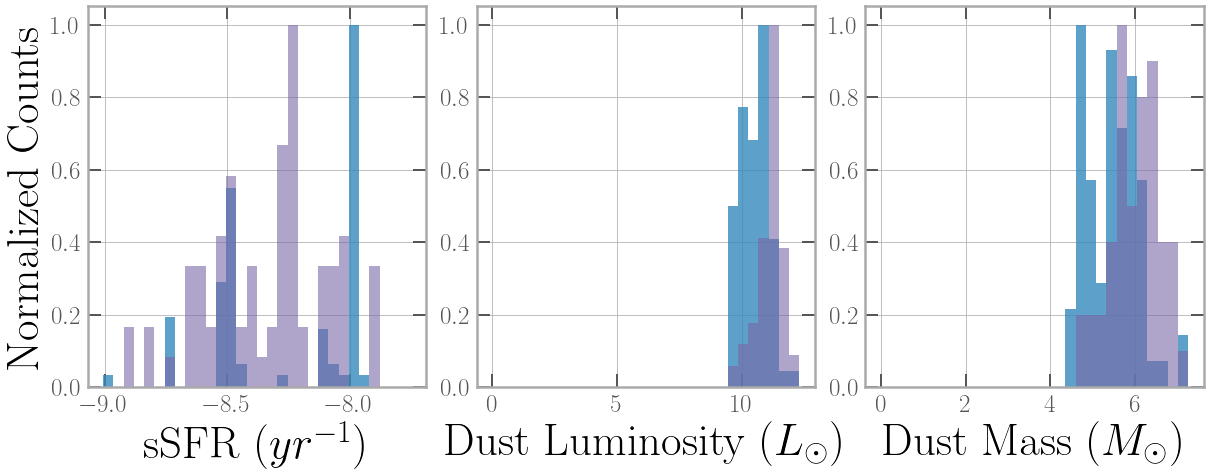

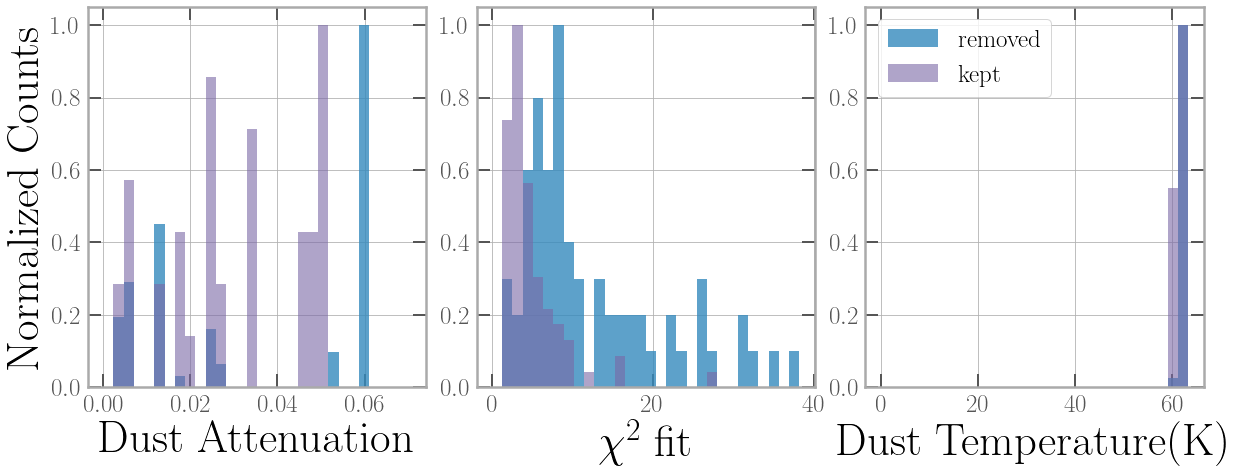

In [54]:
#histograms comparing EELGs for both SEL and non SEL sets
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshift_ES),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshift_ES, bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SM_ES),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SM_ES, bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFR_ES),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFR_ES, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFR_ES),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFR_ES, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldust_ES),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldust_ES, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdust_ES),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdust_ES, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISM_ES)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISM_ES, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2_ES)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2_ES, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISM_ES),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISM_ES, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1_EELGSEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2_EELGSEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8, label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.tight_layout()
plt.legend()
plt.savefig('NormPotato3_EELGSEL',bbox_inches='tight')
plt.show()

In [36]:
#tests that show rounding issue between highz and EELG_SEL redshifts
# test = Table(EELG_SEL['redshift'])#, magphys['redshift'].any())
# test
# test2 = Table(magphys['redshift'])
# test2

In [38]:
#SEL full dataset definitions
SFRs = log10(SEL[r'$SFR_{0.1Gyr}$'])
SMs = log10(SEL['M(stars)'])

SFHs=SEL[r'SFH $f_{mu}$']
IRs=SEL[r'IR $f_{mu}$']
mus=SEL[r'$\mu$']
tauvs=SEL[r'$\tau_V$']
sSFRs=log10(SEL[r'sSFR$_{0.1Gyr}$'])
Ldusts=log10(SEL['Ldust'])
T_CISMs=SEL[r'$T_C^{ISM}$']
T_WBCs=SEL[r'$T_W^{BC}$']
chiCs=SEL[r'$\chi_C^{tot}$']
chiPAHs=SEL[r'$\chi_{PAH}^{tot}$']
chiMIRs=SEL[r'$\chi_{MIR}^{tot}$']
chiWs=SEL[r'$\chi_{W}^{tot}$']
tauISMs=SEL[r'$\tau_{V}^{ISM}$']
Mdusts=log10(SEL['M(dust)'])
redshifts=SEL['redshift']

chi2s=SEL['chi2']

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/640330499.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/640330499.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


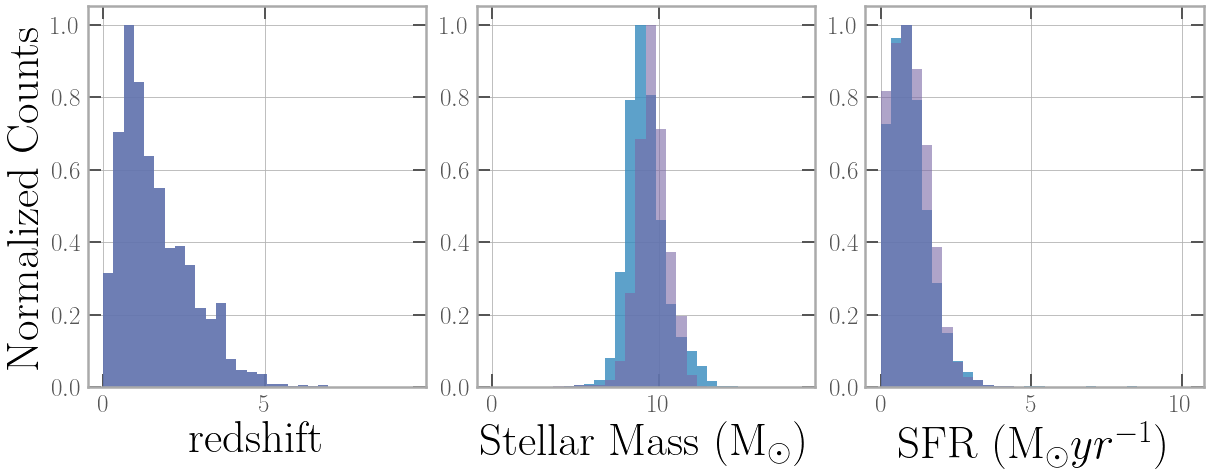

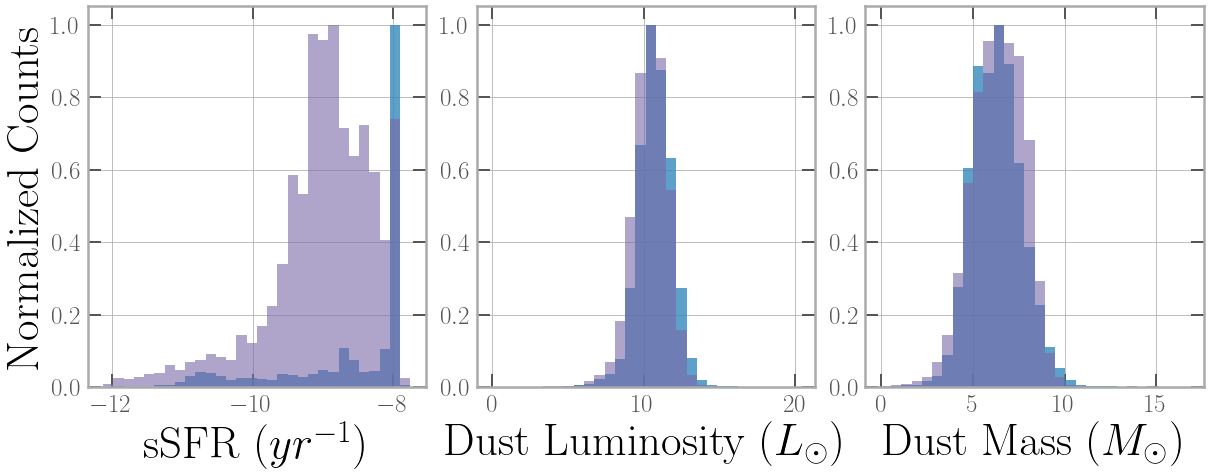

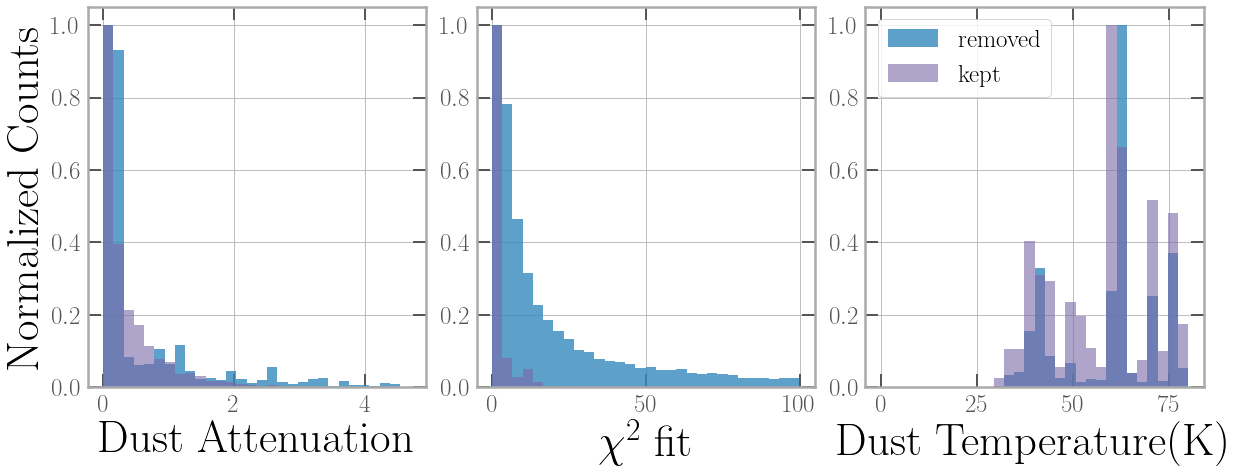

In [55]:
#histograms for SEL and non-SEL full datasets
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts, bins=bin_lims)
hist2, _ = np.histogram(redshifth, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs, bins=bin_limsSM)
hist2SM, _ = np.histogram(SMh, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFRh, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFRh, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldusth, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdusth, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2h, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-SEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-SEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-SEL',bbox_inches='tight')
plt.show()
#Blue = SEL

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/1457408666.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/1457408666.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


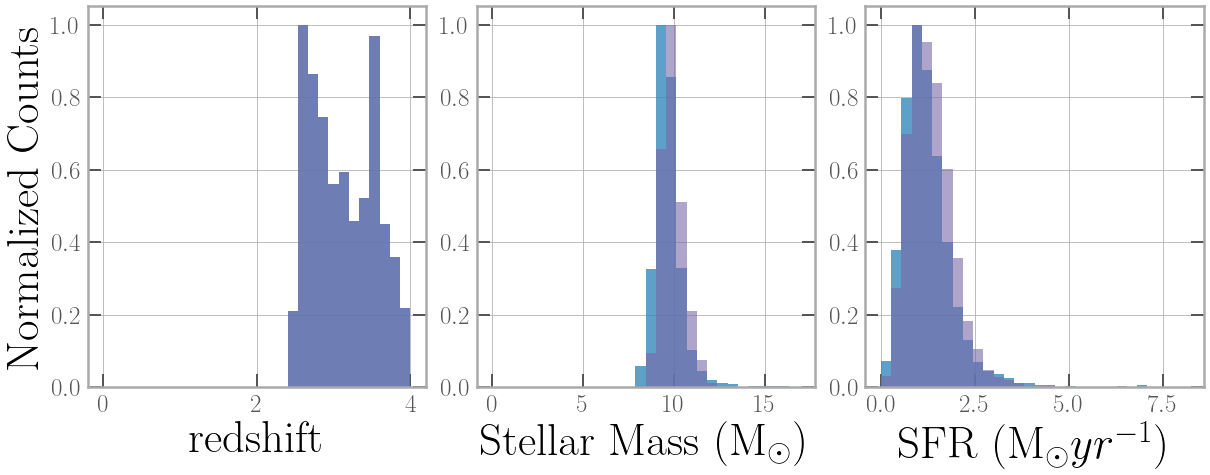

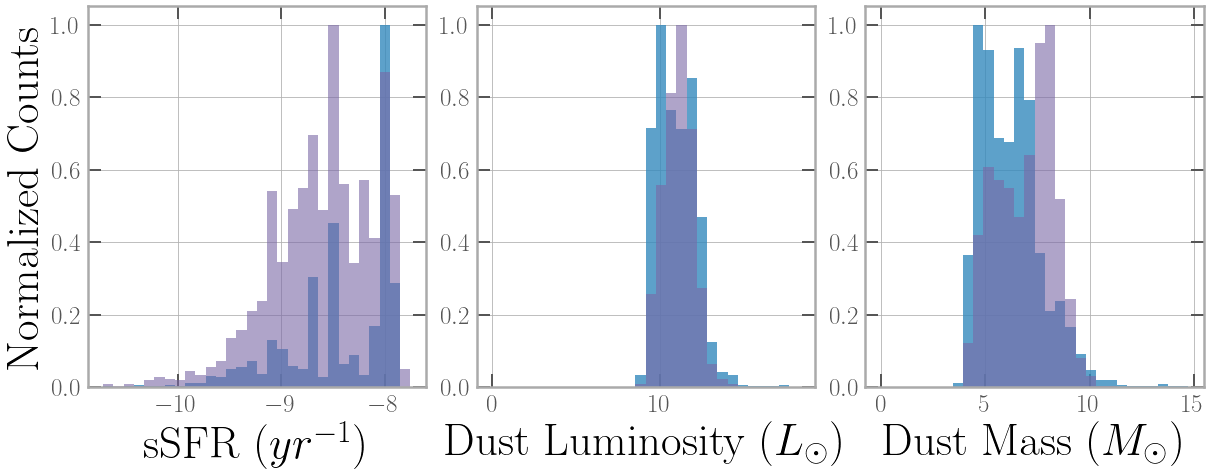

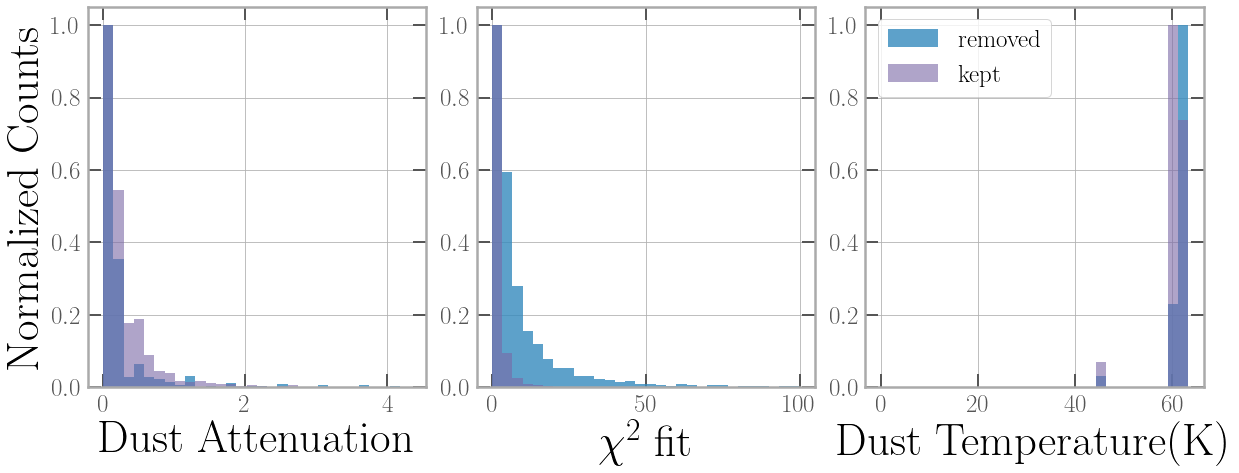

In [56]:
#Histograms for SEL and Non-SEL full datasets between redshifts 2.5 and 4
apples=(2.5<redshifts) & (redshifts<4)
oranges = (2.5<redshifth) & (redshifth<4)
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts[apples]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts[apples], bins=bin_lims)
hist2, _ = np.histogram(redshifth[oranges], bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs[apples]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs[apples], bins=bin_limsSM)
hist2SM, _ = np.histogram(SMh[oranges], bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs[apples]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs[apples], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFRh[oranges], bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs[apples]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs[apples], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFRh[oranges], bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts[apples]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts[apples], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldusth[oranges], bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts[apples]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts[apples], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdusth[oranges], bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs[apples])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs[apples], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISMh[oranges], bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s[apples])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s[apples], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2h[oranges], bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs[apples]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs[apples], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISMh[oranges], bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-SEL-cut',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-SEL-cut',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-SEL-cut',bbox_inches='tight')
plt.show()
#Blue = SEL
#full sample with redshift 2.5-4 only. 

In [41]:
# rem = mag2['redshift'] != 0
maska = (redshifth>2.5) & (redshifth<3) #& (mag2['redshift'] != 0)
maskb = (redshifth<3.5) & (redshifth >3)
maskc = (redshifth<4) & (redshifth >3.5)

mask1a = (redshift>2.5) & (redshift<3) #& (mag2['redshift'] != 0)
mask1b = (redshift<3.5) & (redshift >3)
mask1c = (redshift<4) & (redshift >3.5)

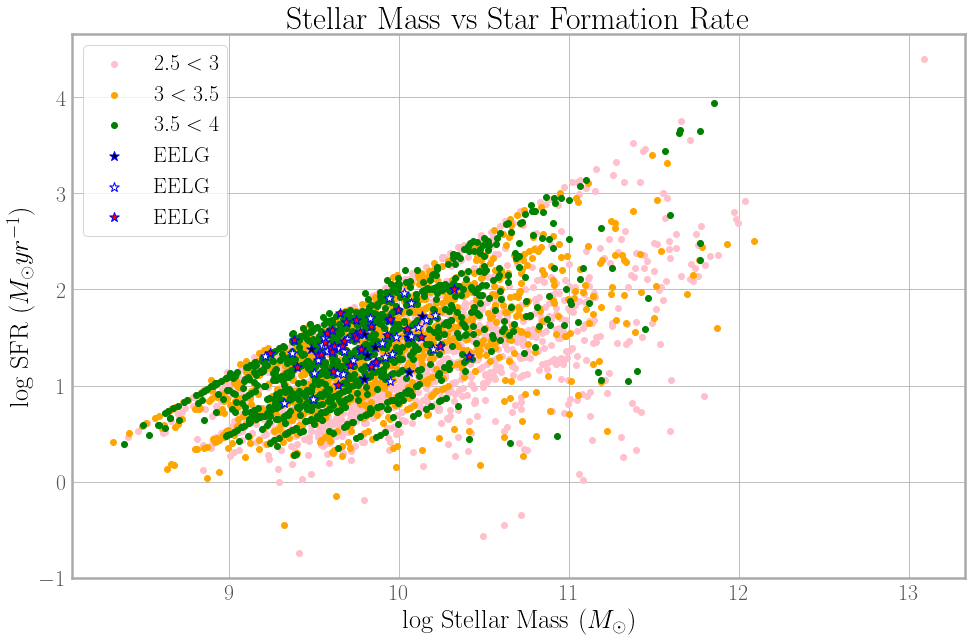

In [59]:
#SM vs SFR with redshifts between 2.5 and 4 (no SEL stuff here)
# plt.scatter(SM[mask6],SFR[mask6])
# smol=big[oranges]
maskchi=big['chi2']<10
# maskred=big['redshift']>0.1
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maska*maskchi*oranges],SFRh[maska*maskchi*oranges],c='pink',label=r'$2.5<3$')
plt.scatter(SMh[maskb*maskchi*oranges],SFRh[maskb*maskchi*oranges],c='orange',label=r'$3<3.5$')
plt.scatter(SMh[maskc*maskchi*oranges],SFRh[maskc*maskchi*oranges],c='green',label=r'$3.5<4$')
plt.scatter(SM[mask1a],SFR[mask1a],marker='*',s=100,c='black',edgecolors='blue',label='EELG')
plt.scatter(SM[mask1b],SFR[mask1b],marker='*',s=100,c='white',edgecolors='blue',label='EELG')
plt.scatter(SM[mask1c],SFR[mask1c],marker='*',s=100,c='red',edgecolors='blue',label='EELG')#s=marker size
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)



plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass Relation full-cut',bbox_inches='tight')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [43]:
# rem = mag2['redshift'] != 0
maska2 = (redshifts>2.5) & (redshifts<3) #& (mag2['redshift'] != 0)
maskb2 = (redshifts<3.5) & (redshifts >3)
maskc2 = (redshifts<4) & (redshifts >3.5)

mask1a2 = (redshift_ES>2.5) & (redshift_ES<3) #& (mag2['redshift'] != 0)
mask1b2 = (redshift_ES<3.5) & (redshift_ES >3)
mask1c2 = (redshift_ES<4) & (redshift_ES >3.5)

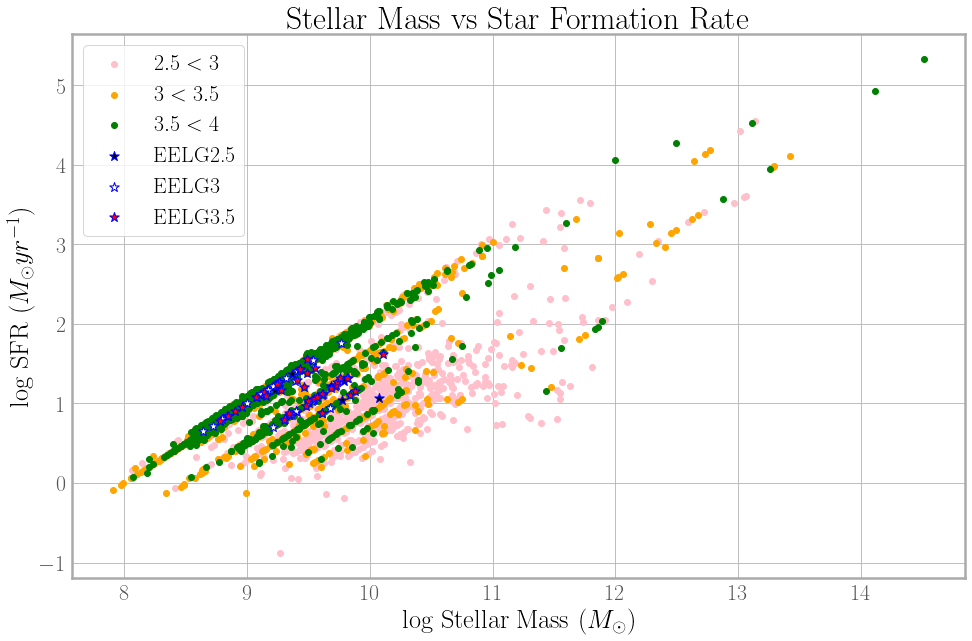

In [60]:
#SM vs SFR for SEL removed and for redshifts between 2.5-4 in the big sample.
# plt.scatter(SM[mask6],SFR[mask6]) 
# smol=big[oranges]
maskchi2=chi2s<10
# maskred=big['redshift']>0.1
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMs[maska2*maskchi2*apples],SFRs[maska2*maskchi2*apples],c='pink',label=r'$2.5<3$')
plt.scatter(SMs[maskb2*maskchi2*apples],SFRs[maskb2*maskchi2*apples],c='orange',label=r'$3<3.5$')
plt.scatter(SMs[maskc2*maskchi2*apples],SFRs[maskc2*maskchi2*apples],c='green',label=r'$3.5<4$')
plt.scatter(SM_ES[mask1a2],SFR_ES[mask1a2],marker='*',s=100,c='black',edgecolors='blue',label='EELG2.5')
plt.scatter(SM_ES[mask1b2],SFR_ES[mask1b2],marker='*',s=100,c='white',edgecolors='blue',label='EELG3')
plt.scatter(SM_ES[mask1c2],SFR_ES[mask1c2],marker='*',s=100,c='red',edgecolors='blue',label='EELG3.5')#s=marker size
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)



plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass Relation full-SEL-cut',bbox_inches='tight')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [48]:
print(len(SMh))
SMh_massmask=(SMh> min(SM)) & (SMh<max(SM))
print(len(SMh[SMh_massmask]))
print(len(SMh[SMh_massmask*oranges]))

24091
11909
3026


/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/234313586.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/234313586.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


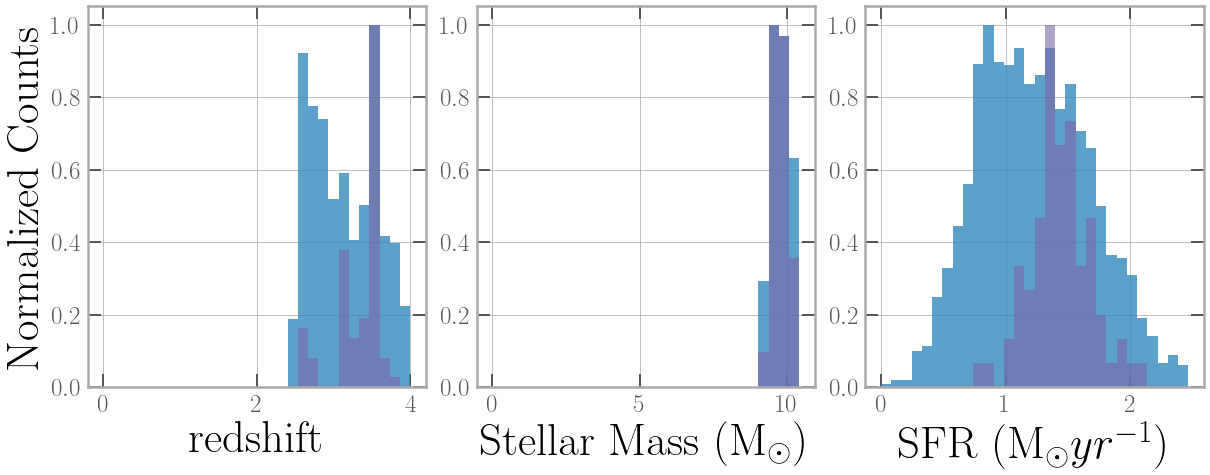

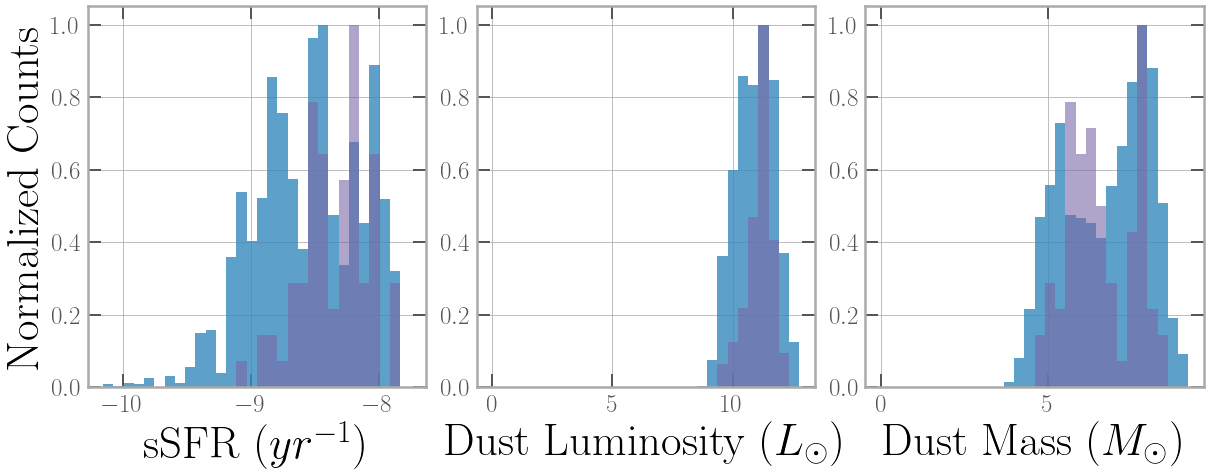

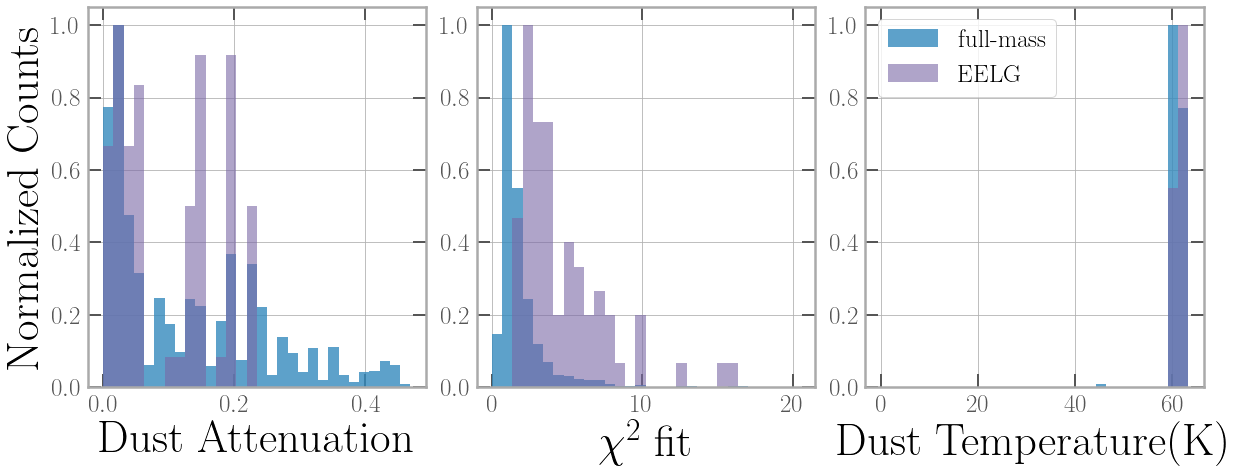

In [62]:
#nonSEL histograms for galaxies between z2.5-4 and mass between min(SM_EELG) and max(SM_EELG)

##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifth[SMh_massmask*oranges]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifth[SMh_massmask*oranges], bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMh[SMh_massmask*oranges]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMh[SMh_massmask*oranges], bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRh[SMh_massmask*oranges]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRh[SMh_massmask*oranges], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRh[SMh_massmask*oranges]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRh[SMh_massmask*oranges], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusth[SMh_massmask*oranges]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusth[SMh_massmask*oranges], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusth[SMh_massmask*oranges]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusth[SMh_massmask*oranges], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMh[SMh_massmask*oranges])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMh[SMh_massmask*oranges], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2h[SMh_massmask*oranges])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2h[SMh_massmask*oranges], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMh[SMh_massmask*oranges]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMh[SMh_massmask*oranges], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-masscut',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-masscut',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='full-mass')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='EELG')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-masscut',bbox_inches='tight')
plt.show()
#Blue = SEL
#full sample with redshift 2.5-4 only. 

In [45]:
#masks for comparing EELG and normal galaxies with the same mass/redshift range
print(len(SMs))
SM_massmask=(SMs> min(SM_ES)) & (SMs<max(SM_ES))
print(len(SMs[SM_massmask]))
SM_SEL_comp = SMs[SM_massmask*apples]
print(len(SM_SEL_comp))

24091
11706
3227


/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/454164823.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/454164823.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


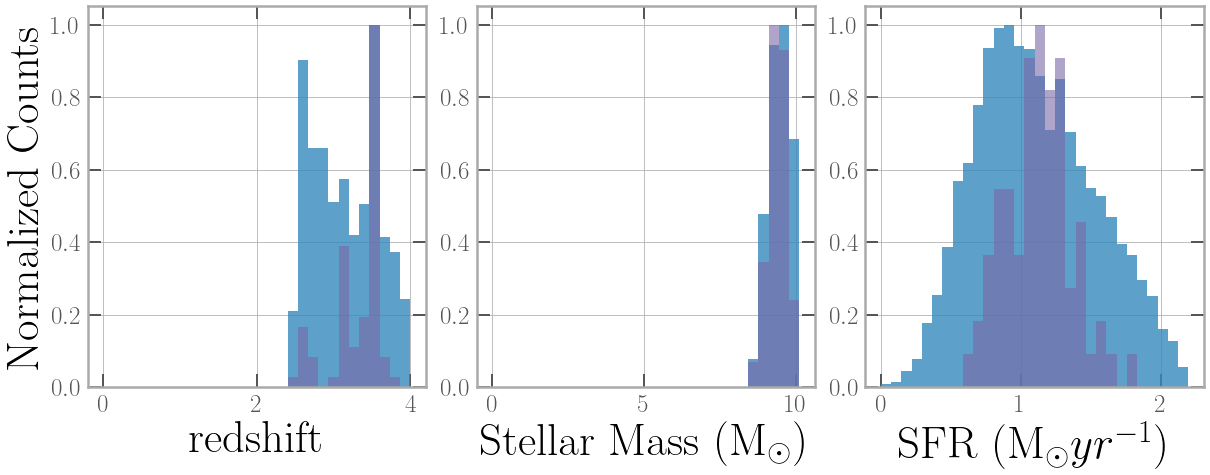

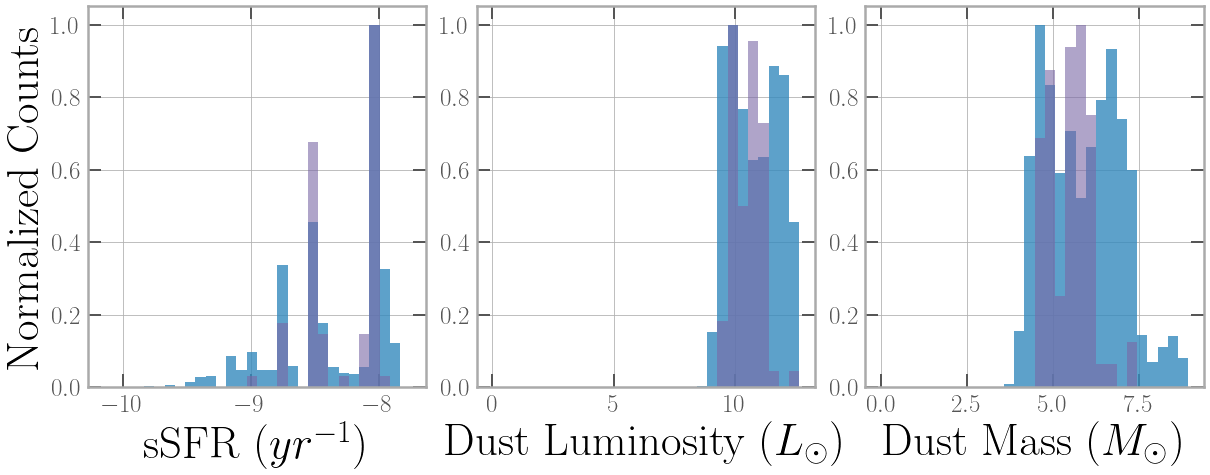

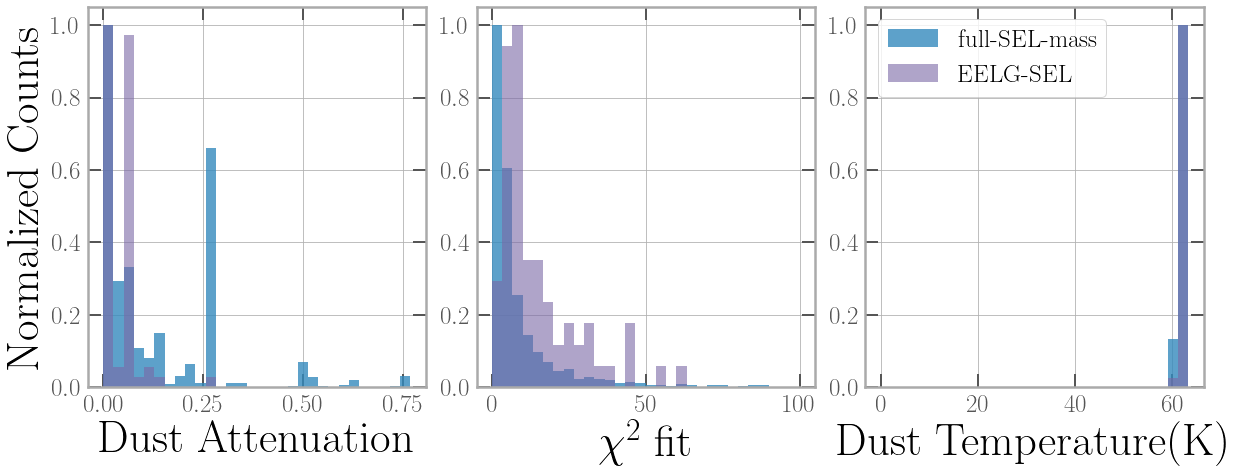

In [63]:
#SEL histograms for galaxies between z2.5-4 and mass between min(SEL_EELG) and max(SEL_EELG)

##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts[SM_massmask*apples]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts[SM_massmask*apples], bins=bin_lims)
hist2, _ = np.histogram(redshift_ES, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs[SM_massmask*apples]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs[SM_massmask*apples], bins=bin_limsSM)
hist2SM, _ = np.histogram(SM_ES, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs[SM_massmask*apples]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs[SM_massmask*apples], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR_ES, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs[SM_massmask*apples]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs[SM_massmask*apples], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR_ES, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts[SM_massmask*apples]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts[SM_massmask*apples], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust_ES, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts[SM_massmask*apples]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts[SM_massmask*apples], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust_ES, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs[SM_massmask*apples])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs[SM_massmask*apples], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM_ES, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s[SM_massmask*apples])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s[SM_massmask*apples], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2_ES, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs[SM_massmask*apples]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs[SM_massmask*apples], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM_ES, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-masscut-SEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-masscut-SEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='full-SEL-mass')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='EELG-SEL')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-masscut-SEL',bbox_inches='tight')
plt.show()

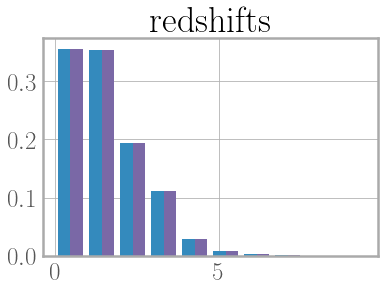

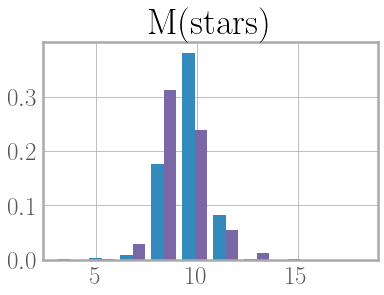

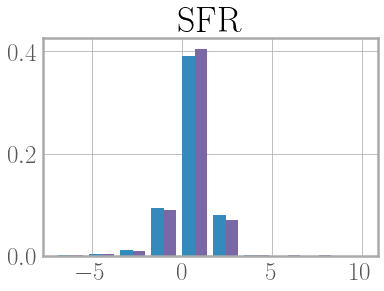

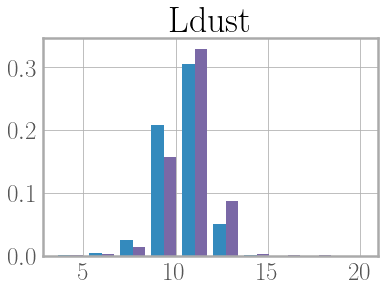

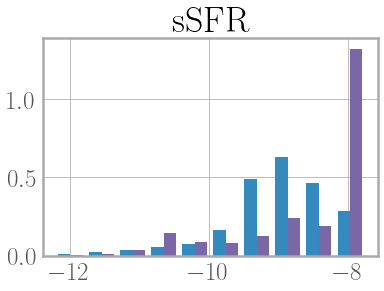

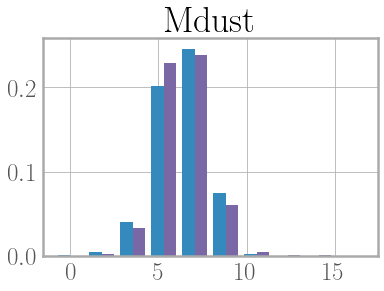

In [47]:
# x,bins,p=plt.hist([redshifth,redshift], bins=20, density=True, histtype='bar')#, stacked=True)
x, bins, p=plt.hist([redshifth,redshifts], density=True)
# plt.bar(x, y2 ,bottom=y1,label='y2')
# for item in p:
#     item.set_height(item.get_height()/sum(x))
plt.title('redshifts')
plt.show()
# plt.hist([SMh,SM], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([SMh,SMs], density=True)
plt.title('M(stars)')
plt.show()
# plt.hist([SFRh,SFR], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([SFRh,SFRs], density=True)
plt.title('SFR')
plt.show()
# plt.hist([Ldusth,Ldust], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([Ldusth,Ldusts], density=True)
plt.title('Ldust')
plt.show()
# plt.hist([sSFRh,sSFR], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([sSFRh,sSFRs], density=True)
plt.title('sSFR')
plt.show()
# plt.hist([Mdusth,Mdust], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([Mdusth,Mdusts], density=True)
plt.title('Mdust')
plt.show()

<Figure size 1440x720 with 0 Axes>

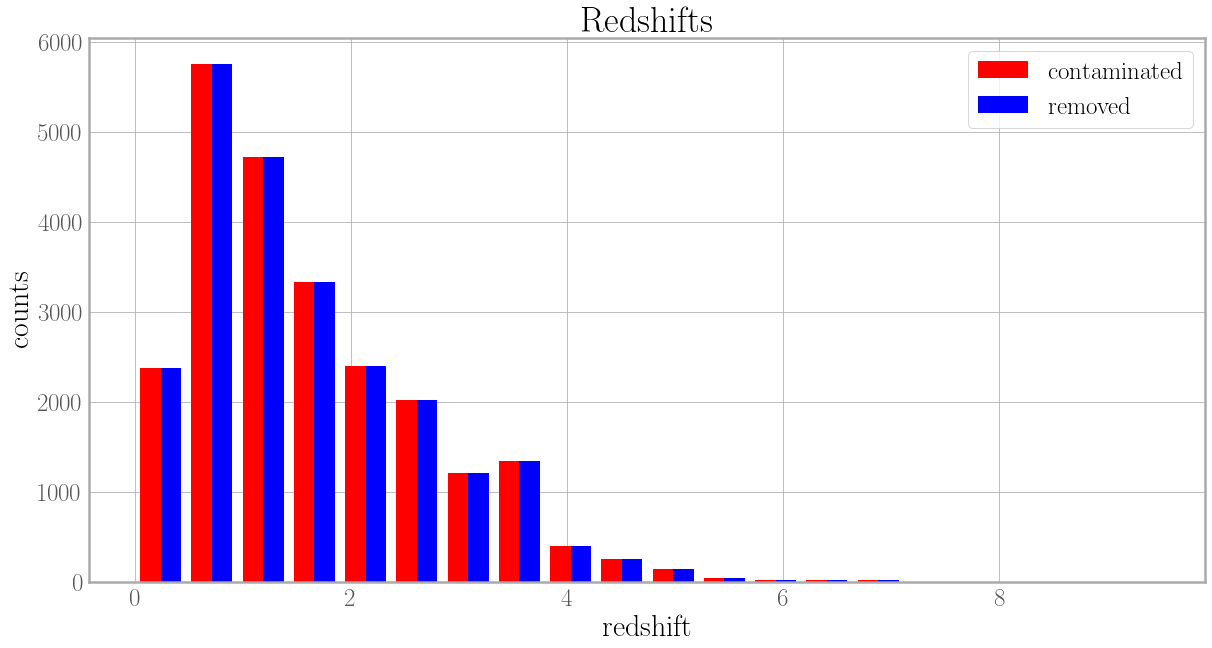

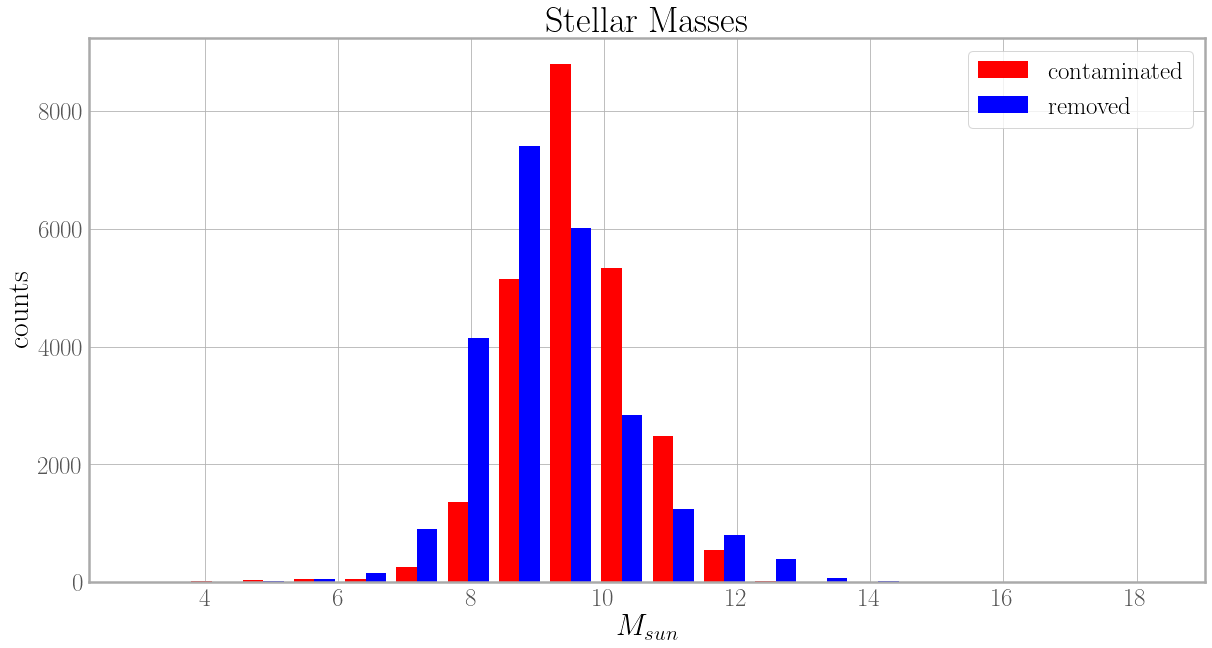

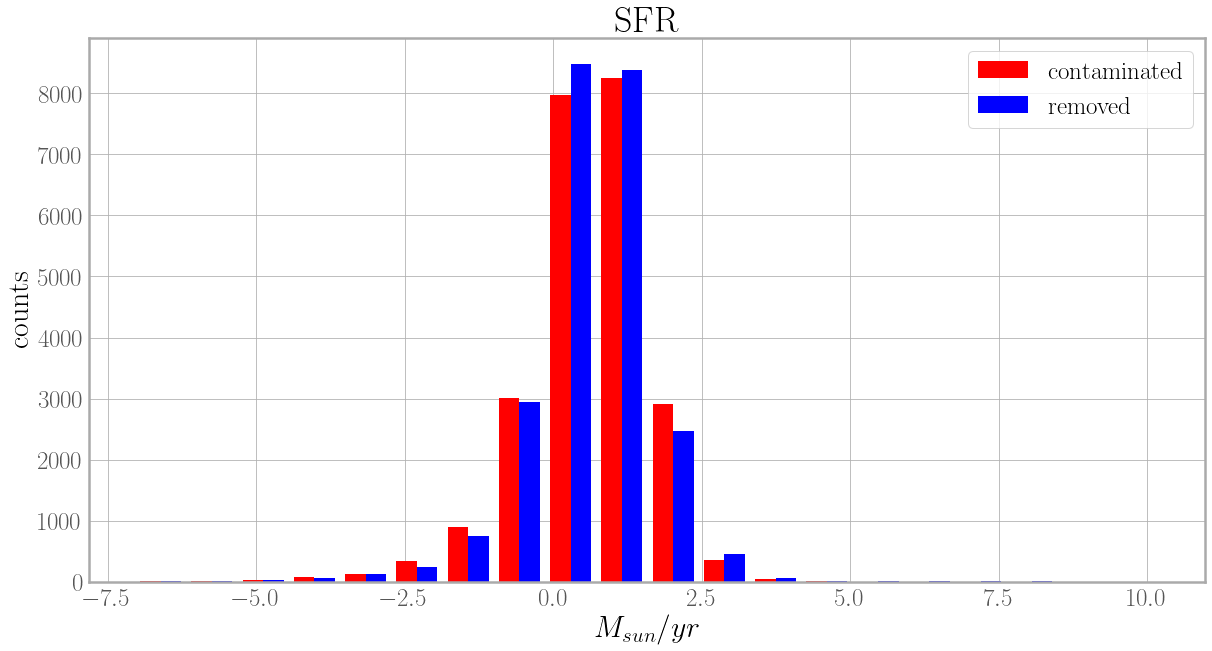

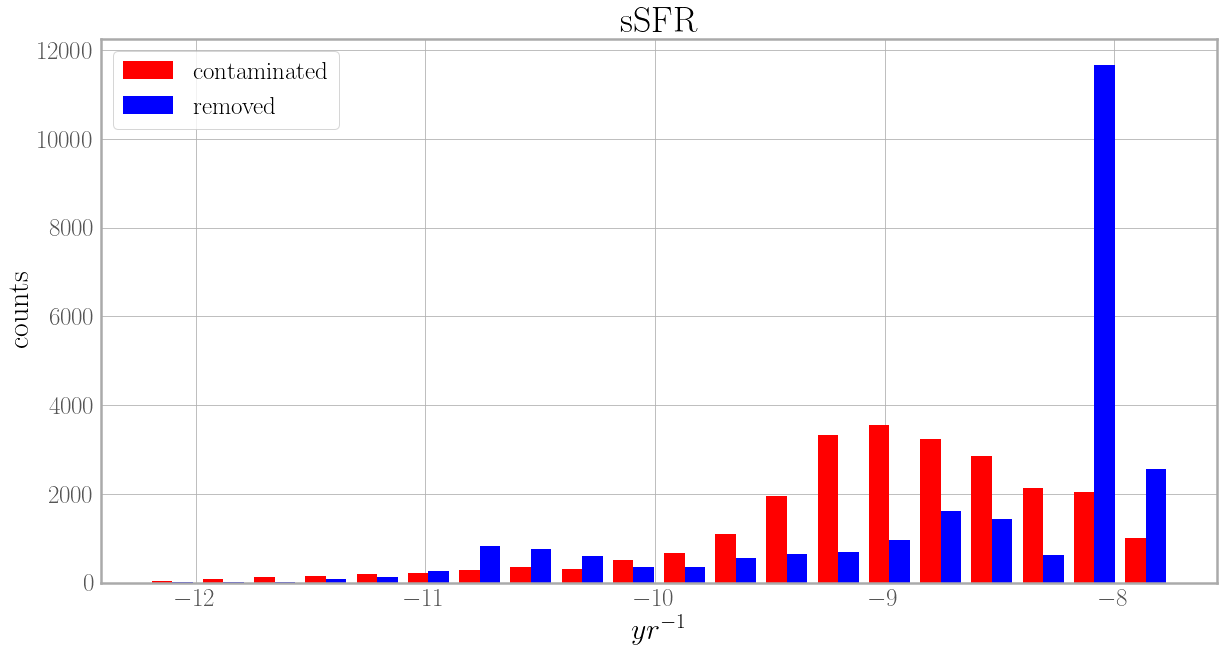

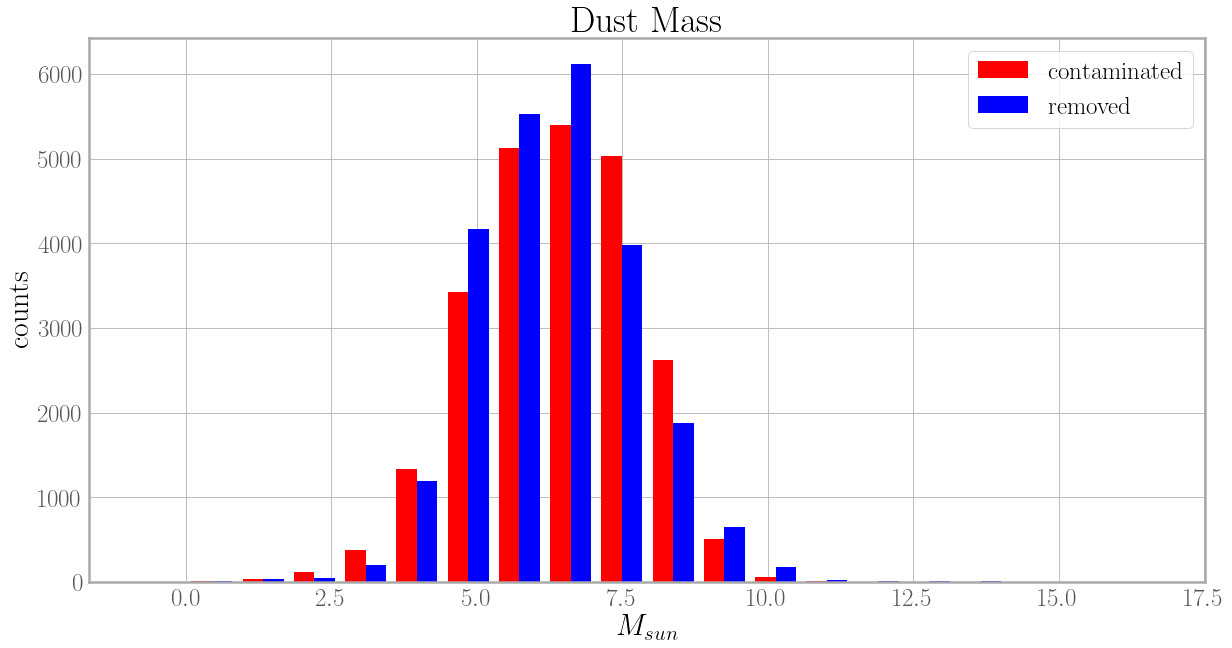

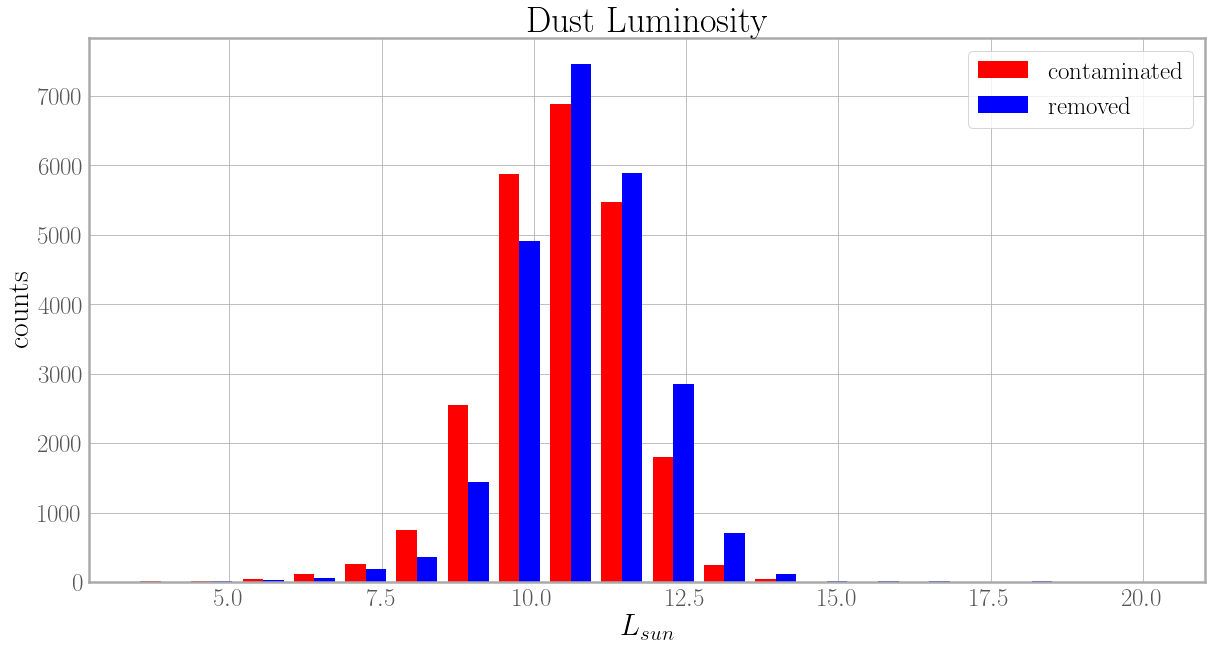

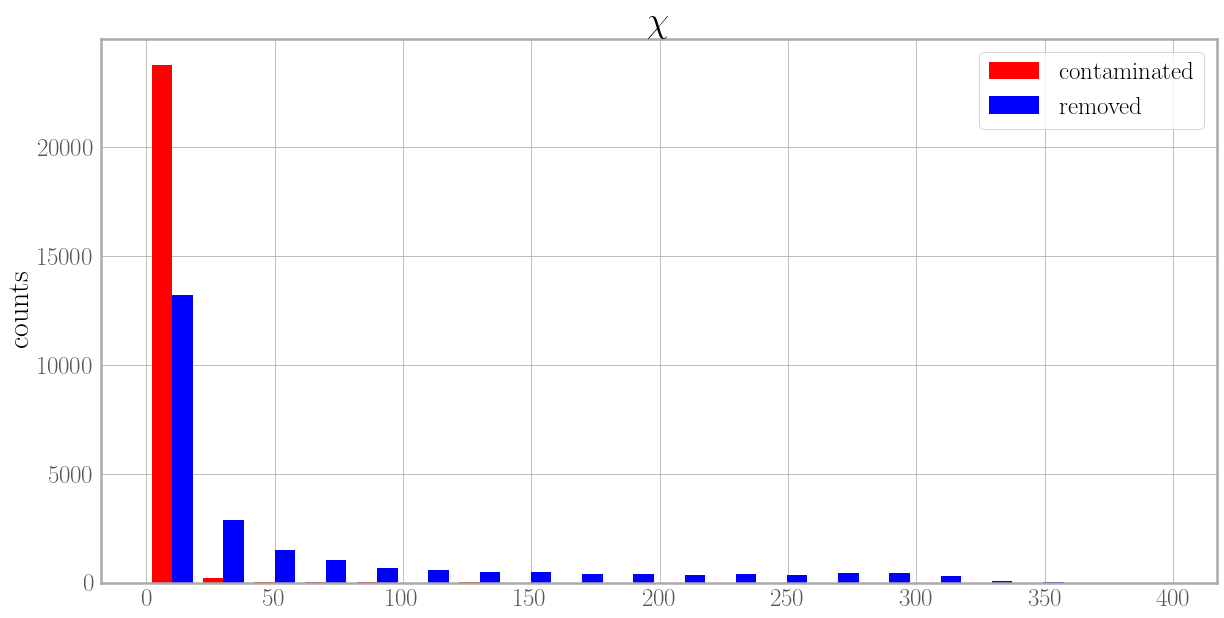

<Figure size 1440x720 with 0 Axes>

In [85]:
plt.figure(figsize=(20,10))
plt.hist([redshifth,redshifts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Redshifts')
plt.xlabel('redshift')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL1',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SMh,SMs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Stellar Masses')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL2',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SFRh,SFRs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('SFR')
plt.xlabel(r'$M_{sun}/yr$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL3',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([sSFRh,sSFRs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('sSFR')
plt.xlabel(r'$yr^{-1}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL4',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Mdusth,Mdusts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Mass')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL5',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Ldusth,Ldusts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Luminosity')
plt.xlabel(r'$L_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL6',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([chi2h,chi2s],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title(r'$\chi$')
plt.xlabel('')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL7',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################

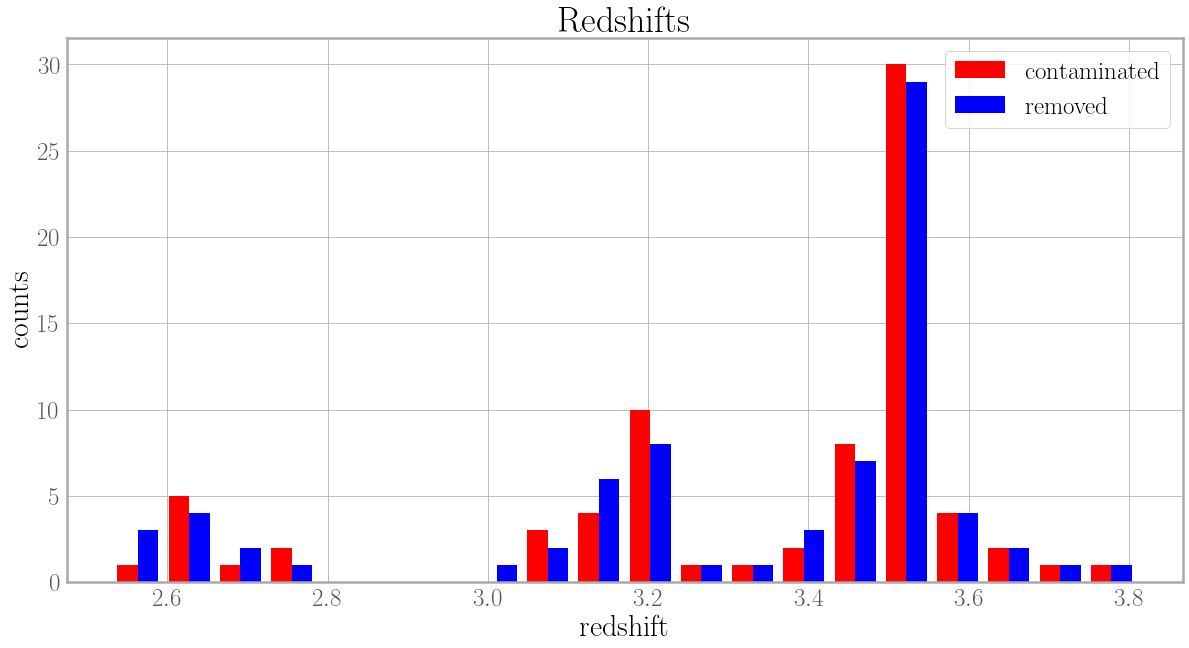

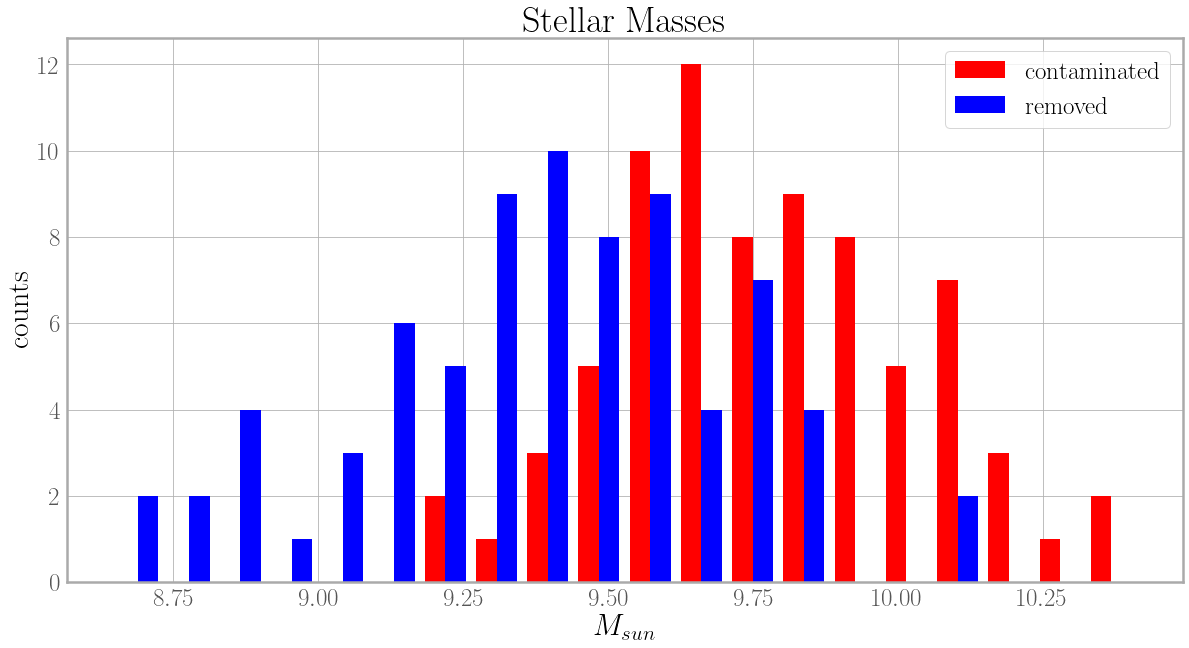

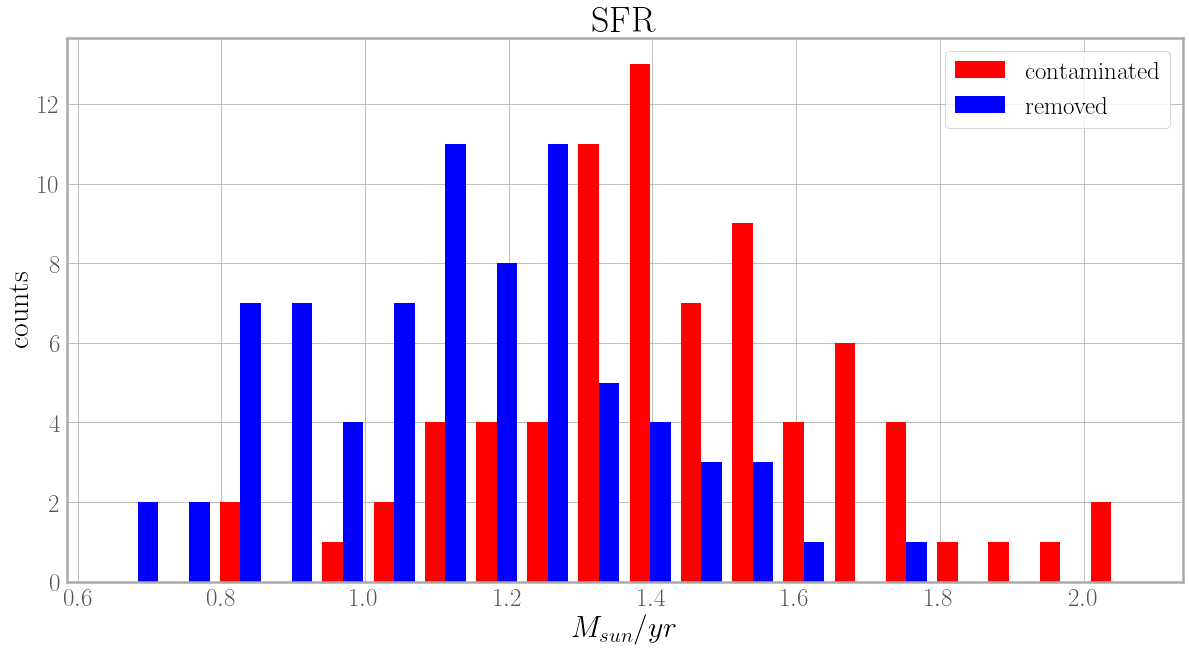

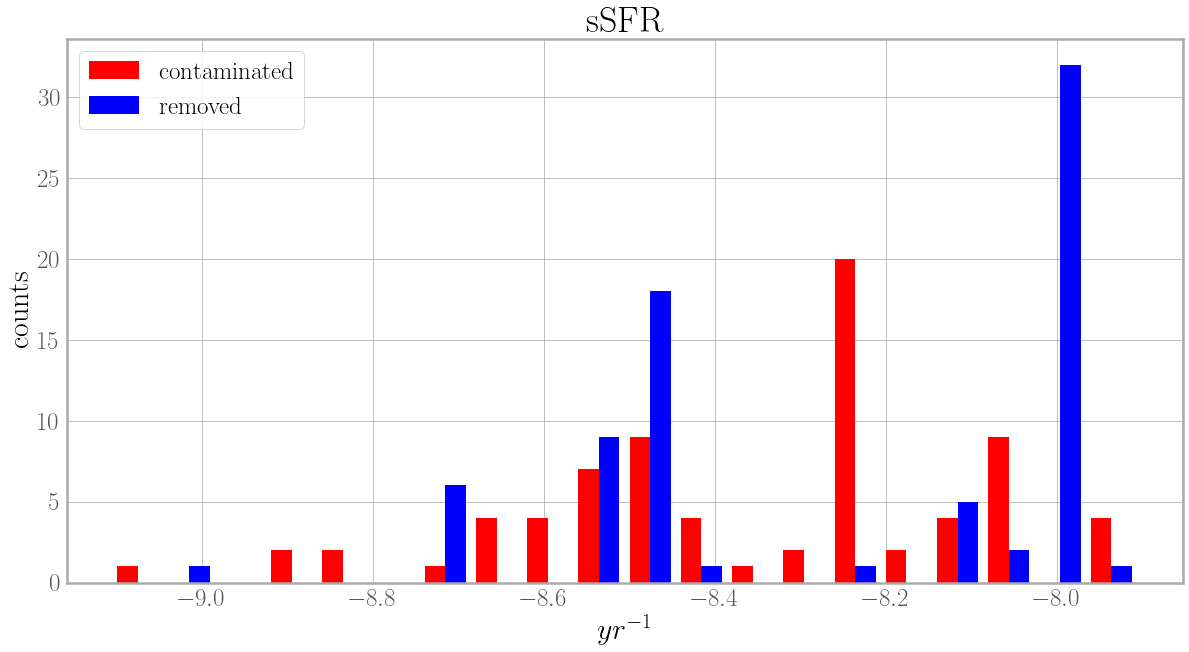

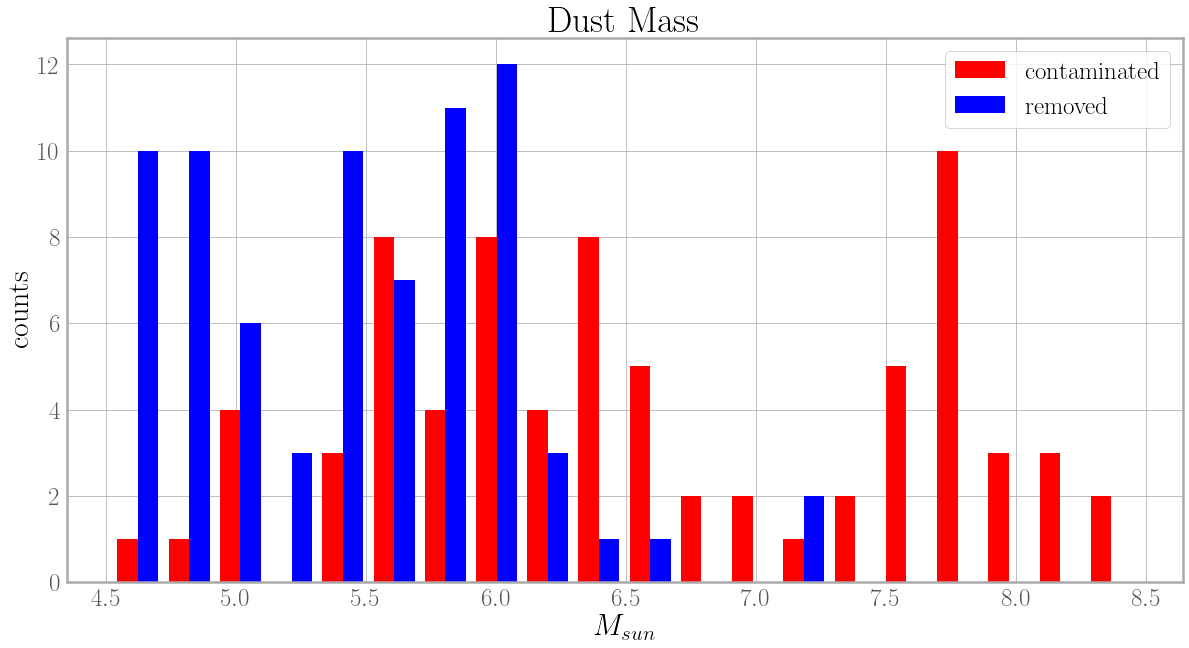

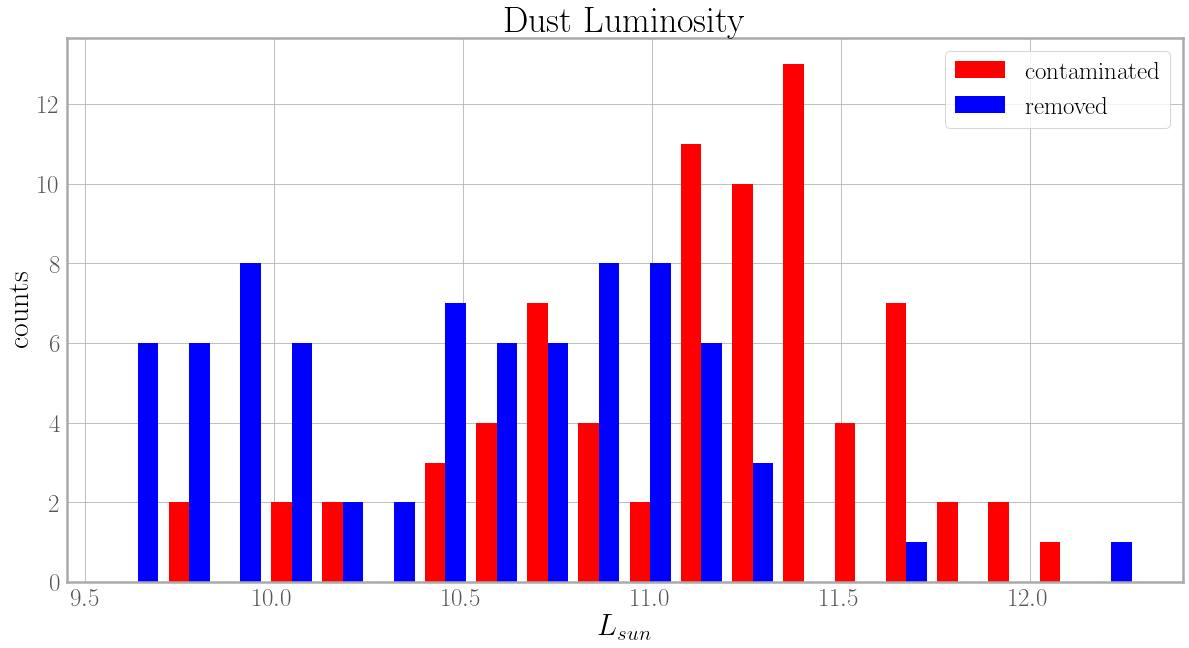

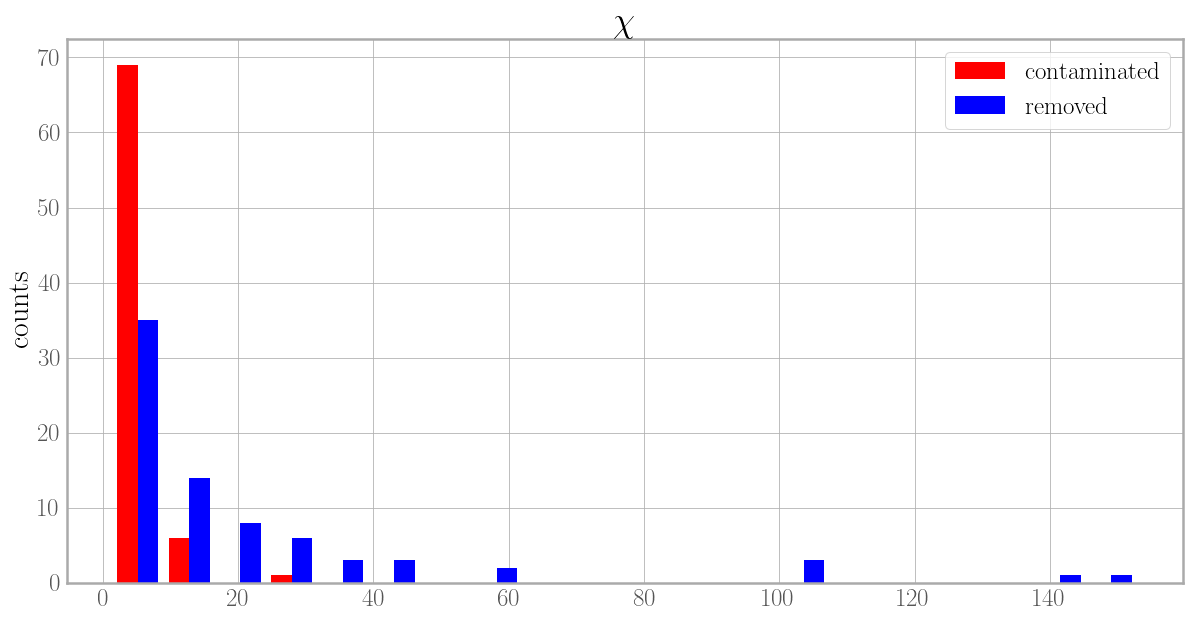

In [87]:
plt.figure(figsize=(20,10))
plt.hist([redshift,redshift_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Redshifts')
plt.xlabel('redshift')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL1EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SM,SM_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Stellar Masses')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL2EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SFR,SFR_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('SFR')
plt.xlabel(r'$M_{sun}/yr$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL3EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([sSFR,sSFR_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('sSFR')
plt.xlabel(r'$yr^{-1}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL4EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Mdust,Mdust_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Mass')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL5EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Ldust,Ldust_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Luminosity')
plt.xlabel(r'$L_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL6EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([chi2,chi2_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title(r'$\chi$')
plt.xlabel('')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL7EELGS',bbox_inches='tight')
# plt.figure(figsize=(20,10))
######################################################################################

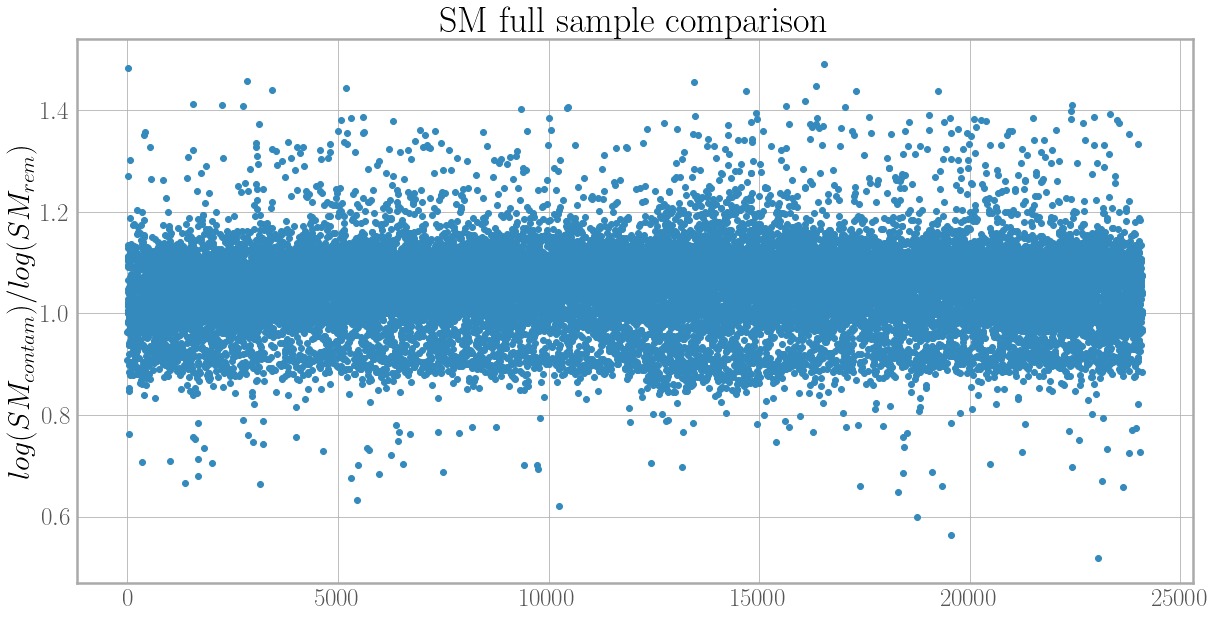

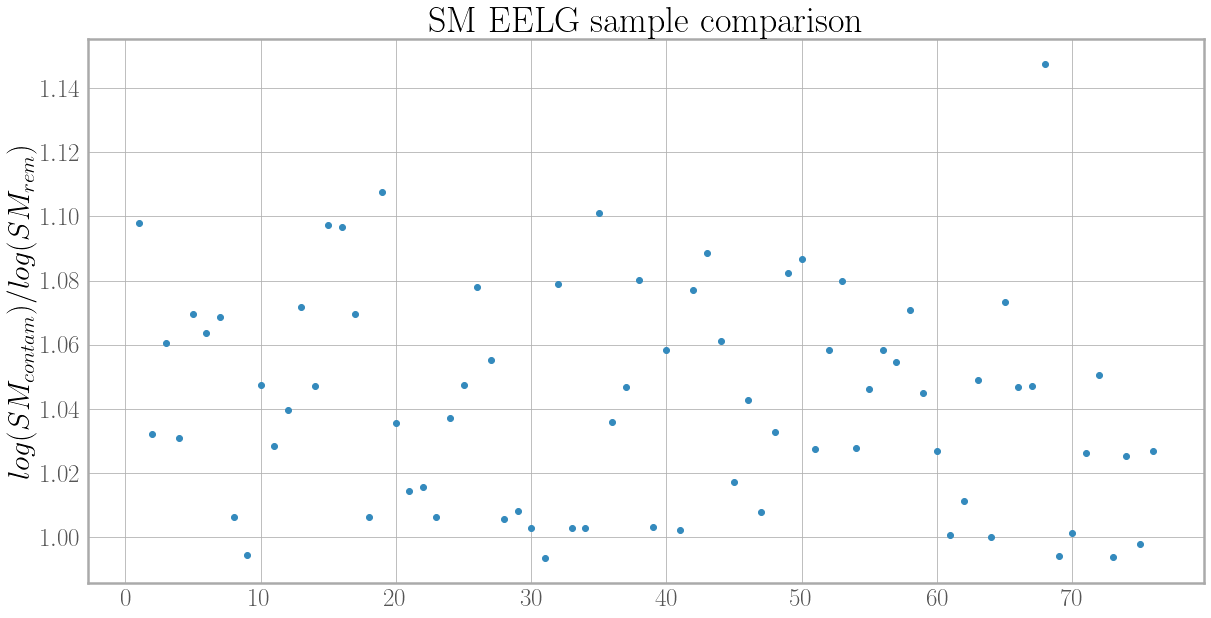

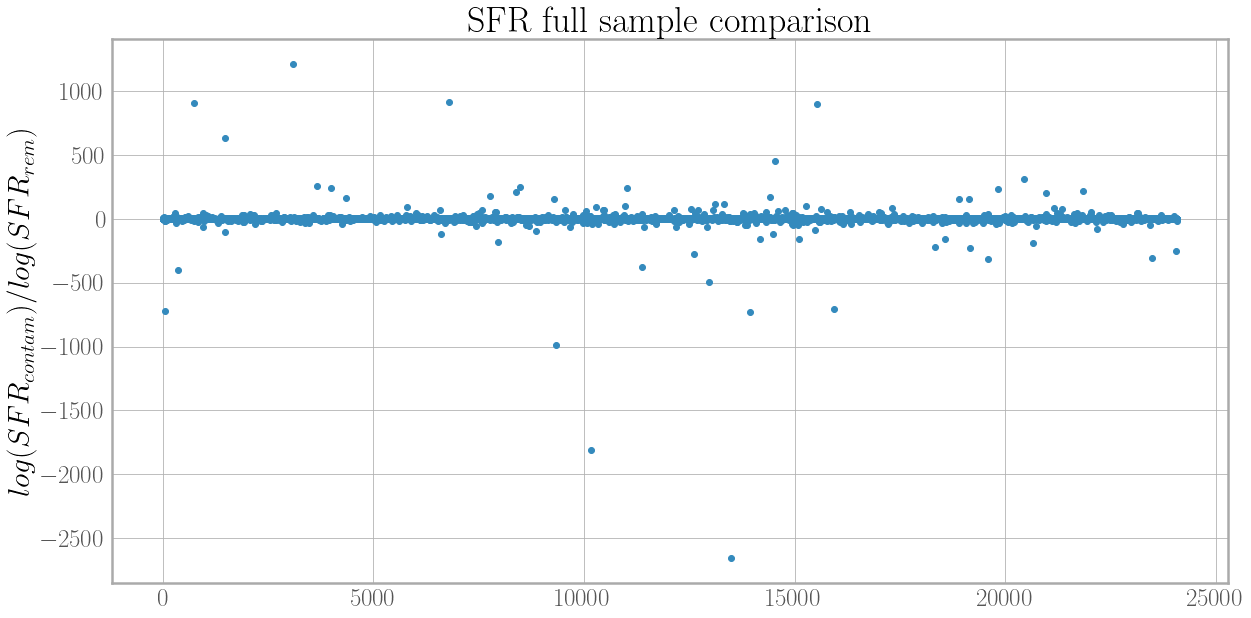

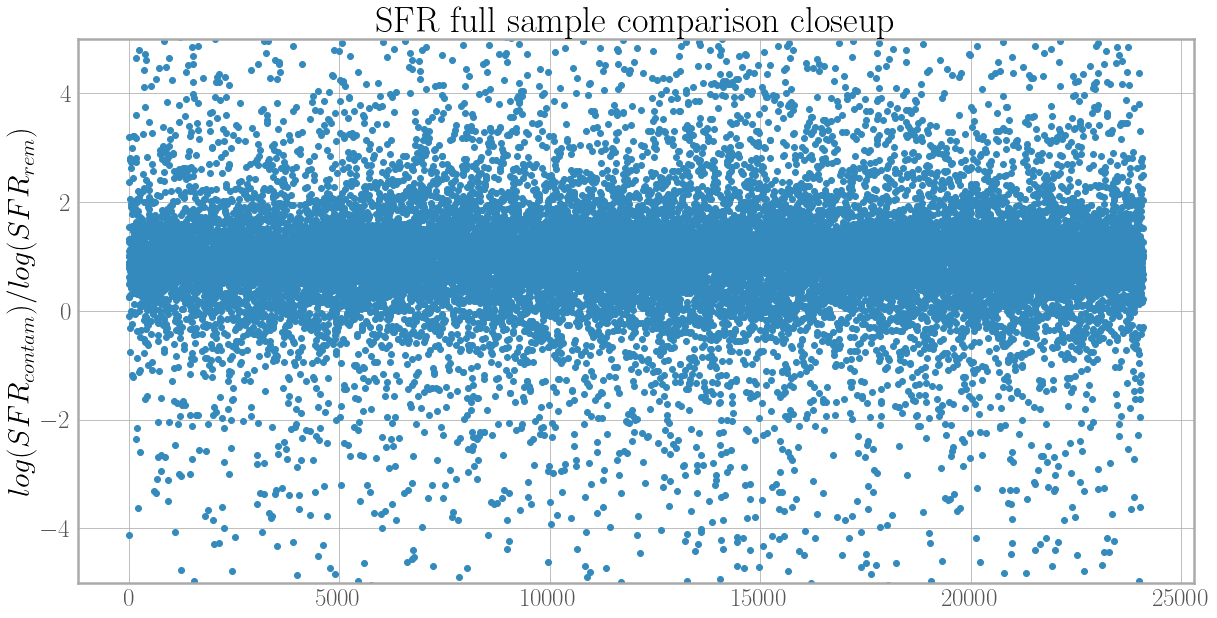

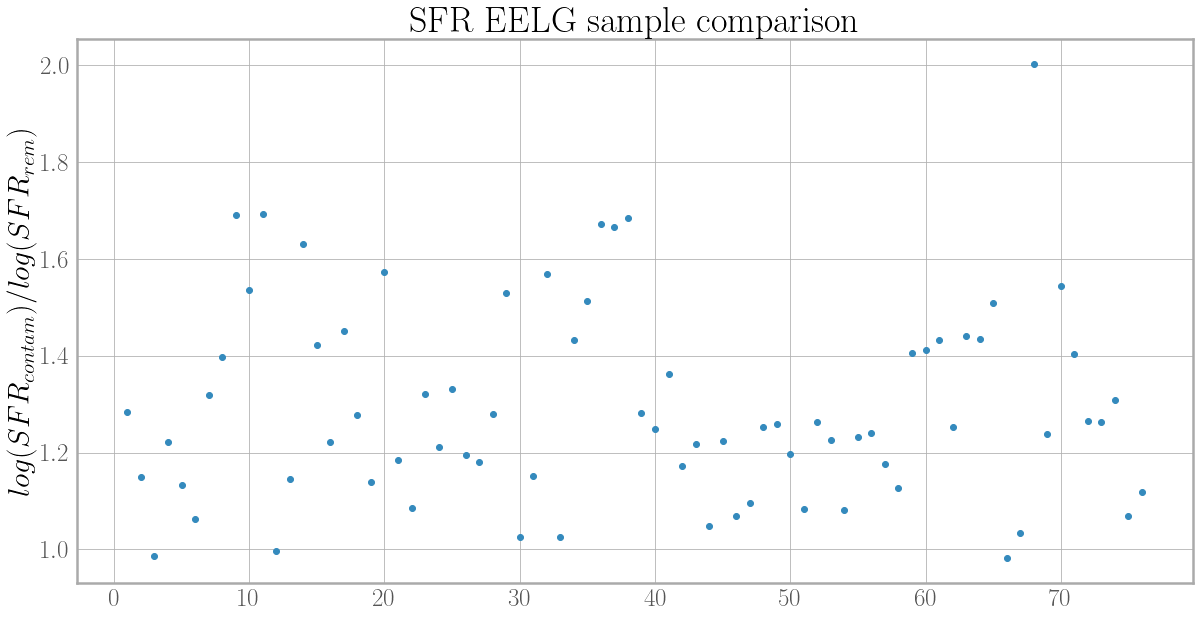

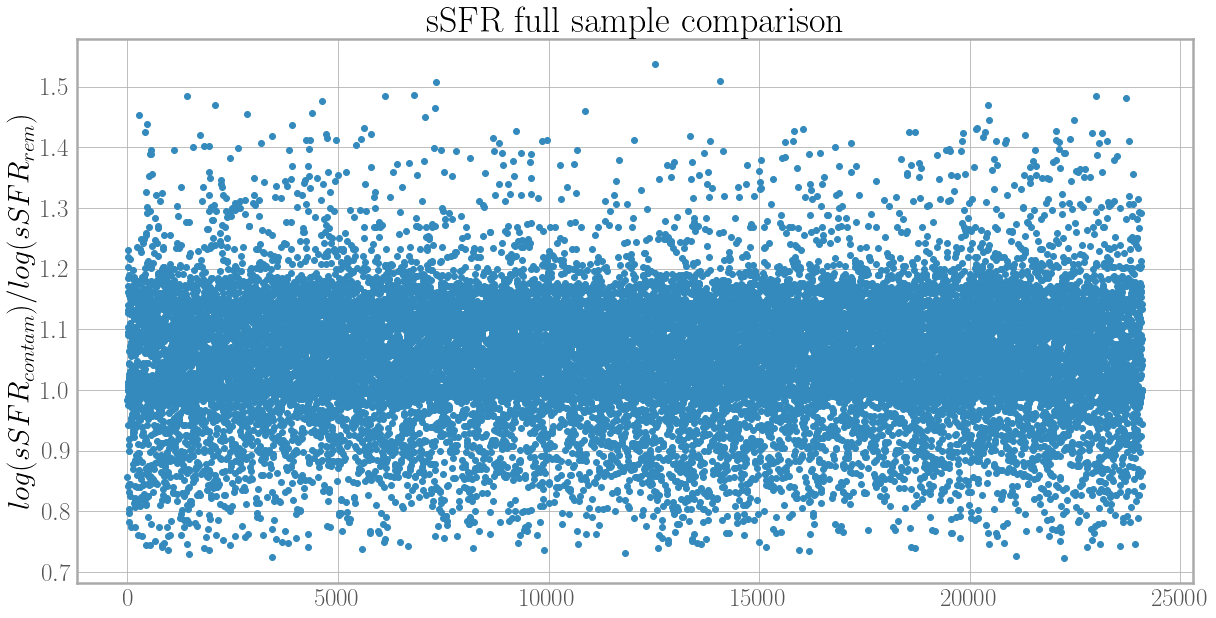

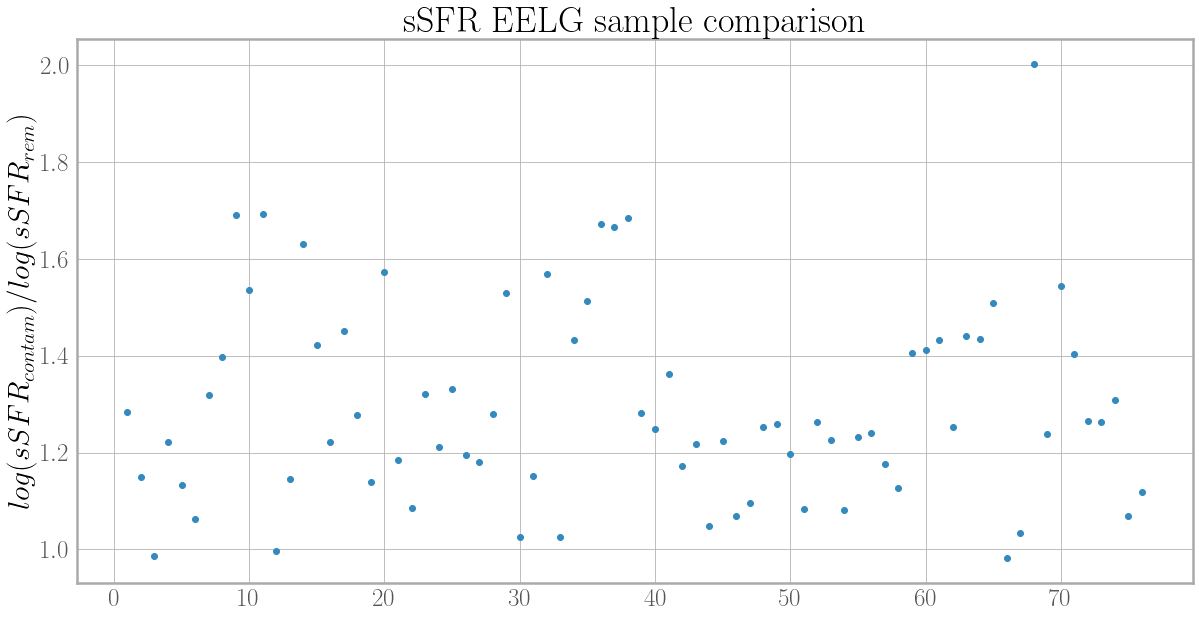

In [115]:
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SMh),len(SMh)),(SMh/SMs))
plt.ylabel(r'$log(SM_{contam})/log(SM_{rem})$')
plt.title('SM full sample comparison')
plt.savefig('SeptemberUpdateSM1',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SM),len(SM)),(SM/SM_ES))
plt.ylabel(r'$log(SM_{contam})/log(SM_{rem})$')
plt.title('SM EELG sample comparison')
plt.savefig('SeptemberUpdateSM2',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFRh),len(SFRh)),(SFRh/SFRs))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.savefig('SeptemberUpdateSFR1a',bbox_inches='tight')
plt.title('SFR full sample comparison')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFRh),len(SFRh)),(SFRh/SFRs))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.title('SFR full sample comparison closeup')
plt.ylim(-5,5)
plt.savefig('SeptemberUpdateSFR1b',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFR),len(SFR)),(SFR/SFR_ES))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.title('SFR EELG sample comparison')
plt.savefig('SeptemberUpdateSFR2',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(sSFRh),len(sSFRh)),(sSFRh/sSFRs))
plt.ylabel(r'$log(sSFR_{contam})/log(sSFR_{rem})$')
plt.title('sSFR full sample comparison')
plt.savefig('SeptemberUpdate_sSFR1',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFR),len(SFR)),(SFR/SFR_ES))
plt.ylabel(r'$log(sSFR_{contam})/log(sSFR_{rem})$')
plt.title('sSFR EELG sample comparison')
plt.savefig('SeptemberUpdate_sSFR2',bbox_inches='tight')


In [93]:
len(linspace(1,SMh,len(SMh)))

24091

In [ ]:
#Need SM, SFR, sSFR, DustM, DustL, chi2 with errors.
#To calculate errors find the 86-16 percentile values, subtract the central value then average. This should be error 